# UK House Prices Analysis

## Table of Contents

**A) Part 1: Data Preparation**  
&nbsp;&nbsp;&nbsp;&nbsp;1. Loading and preparing the data

**B) Part 2: Analysis**  
&nbsp;&nbsp;&nbsp;&nbsp;1. Separating the region data from the area data  
&nbsp;&nbsp;&nbsp;&nbsp;2. Ensuring the area dataframe only contains area data  
&nbsp;&nbsp;&nbsp;&nbsp;3. Ensuring the region dataframe only contains region data  
&nbsp;&nbsp;&nbsp;&nbsp;4. Using 'location code' data to associate areas with their respective regions  
&nbsp;&nbsp;&nbsp;&nbsp;5. Verifying the correct regions have been added to the areas dataframe  
&nbsp;&nbsp;&nbsp;&nbsp;6. Checking for missing values in the region and area data  
&nbsp;&nbsp;&nbsp;&nbsp;7. Deciding how to handle NaN values  
&nbsp;&nbsp;&nbsp;&nbsp;8. Dropping rows with NaN values

**C) Part 2.2: Trends**  
&nbsp;&nbsp;&nbsp;&nbsp;1. Analysing trends using region data  
&nbsp;&nbsp;&nbsp;&nbsp;2. Sorting the region data  
&nbsp;&nbsp;&nbsp;&nbsp;3. Plotting trends in property prices across regions (September 2016 - August 2019)  
&nbsp;&nbsp;&nbsp;&nbsp;4. Commenting on property price trends (September 2016 - August 2019)  
&nbsp;&nbsp;&nbsp;&nbsp;5. Plotting Flat and Detached Property prices by region  
&nbsp;&nbsp;&nbsp;&nbsp;6. Commenting on Flat and Detached Property prices by region  
&nbsp;&nbsp;&nbsp;&nbsp;7. Using moving averages to identify seasonal changes in Flat and Detached property prices by region  
&nbsp;&nbsp;&nbsp;&nbsp;8. Commenting on seasonal changes in Flat and Detached property prices by region

**D) Part 3: Price Changes**  
&nbsp;&nbsp;&nbsp;&nbsp;1. Calculating price changes in each area (July 2017 - July 2018)  
&nbsp;&nbsp;&nbsp;&nbsp;2. Visualising changes in flat prices in each area  
&nbsp;&nbsp;&nbsp;&nbsp;3. Commenting on price changes in each region

**E) Part 4: Statistical Analysis**  
&nbsp;&nbsp;&nbsp;&nbsp;1. Cross-tabulating areas with price increases and decreases by region  
&nbsp;&nbsp;&nbsp;&nbsp;2. Performing a chi-square test to assess regional differences in Flat price changes  
&nbsp;&nbsp;&nbsp;&nbsp;3. Commenting on the chi-square test results



## Part 1: Data Preparation


Loading and preparing the data

In [ ]:
# Importing the appropriate data-processing and plotting libraries that I will be using.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy.stats as stats
%matplotlib inline

In [ ]:
# Importing average-property-price.csv

app = pd.read_csv('average-property-price.csv')

# Importing location-codes.csv

lc = pd.read_csv('location-codes.csv')

In [ ]:
# Converting the dates into Uk type

prices = pd.read_csv('average-property-price.csv')
prices = prices.assign(Month = pd.to_datetime(
 prices['Date'], dayfirst=True)).drop(labels='Date', axis=1)

## Part 2: Analysis

Firstly I will add the region to each area in the area price data

In [ ]:
# Creating a dataframe 'region_data' to only contain the idexes of properities that begin with the 'E12' code prefix

region_data = prices['Code'].str.extract('(^E12)')
region_data.dropna(inplace=True)
region_data

,0
5436,E12
5437,E12
5438,E12
5439,E12
5440,E12
...,...
5755,E12
5756,E12
5757,E12
5758,E12


In [ ]:
# Creating a dataframe 'area_pp' containing area data only

area_pp = prices
area_pp = area_pp.drop(region_data.index[:,])
area_pp

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01


In [ ]:
# checking that my area dataframe only contains area data

check_area = area_pp['Code'].str.extract('(^E12)')
check_area = check_area.dropna()
check_area

,0


In [ ]:
# Creating a dataframe 'region_pp' containing region data only

region_pp = prices
region_pp = region_pp.drop(area_pp.index[:,])
region_pp

,Area,Code,Detached,Semi,Terraced,Flat,Month
5436,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412,2016-09-01
5437,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508,2016-10-01
5438,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739,2016-11-01
5439,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119,2016-12-01
5440,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


Checking my region dataframe only contains region data

In [ ]:
# checking that my area dataframe only contains area data

check_region = region_pp['Code'].str.extract('(^E12)')
check_region = check_region.dropna()
check_region.isna().sum()


0    0
dtype: int64

In [ ]:
# renaming the area column of the region dataframe as region

region_pp = region_pp.rename(columns={'Area': 'Region'})
region_pp

,Region,Code,Detached,Semi,Terraced,Flat,Month
5436,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412,2016-09-01
5437,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508,2016-10-01
5438,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739,2016-11-01
5439,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119,2016-12-01
5440,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


In [ ]:
# Printing my lc dataframe

lc

,AuthorityCode,AuthorityName,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East
...,...,...,...,...
149,E10000029,Suffolk,E12000006,East of England
150,E10000030,Surrey,E12000008,South East
151,E10000031,Warwickshire,E12000005,West Midlands
152,E10000032,West Sussex,E12000008,South East


In [ ]:
# Merging the two dataframes together based on overlaps in 'code' and 'AuthorityCode'

area_pp= area_pp.merge(lc,how= 'left',left_on='Code', right_on='AuthorityCode')
area_pp

,Area,Code,Detached,Semi,Terraced,Flat,Month,AuthorityCode,AuthorityName,RegionCode,RegionName
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01,E06000001,Hartlepool,E12000001,North East
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01,E06000001,Hartlepool,E12000001,North East
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01,E06000001,Hartlepool,E12000001,North East
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01,E06000001,Hartlepool,E12000001,North East
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01,E06000001,Hartlepool,E12000001,North East
...,...,...,...,...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01,E10000034,Worcestershire,E12000005,West Midlands
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01,E10000034,Worcestershire,E12000005,West Midlands
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01,E10000034,Worcestershire,E12000005,West Midlands
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01,E10000034,Worcestershire,E12000005,West Midlands


Checking to see if the correct region has been added for a randomly selected row of area_pp

I have randomly chosen row 2001 from the area dataframe to be checked/tested.

In [ ]:
# Printing out row 2001 of area dataframe

area_pp.iloc[[2001]]

,Area,Code,Detached,Semi,Terraced,Flat,Month,AuthorityCode,AuthorityName,RegionCode,RegionName
2001,Bolton,E08000001,234144.9179,141502.9673,106316.9827,89684.08916,2018-06-01,E08000001,Bolton,E12000002,North West


For the printed row with index 2001, the area code is E08000001. In the next few steps I will be trying to print the row from the location codes dataframe that contains the Authority code E08000001, to see what region it should belong to.

In [ ]:
# Printing out the row that corresponds to the E08000001 AuthorityCode in the locations dataframe

check = lc['AuthorityCode'].str.extract('(E08000001)')
check.dropna(inplace=True)
lc.loc[58]

AuthorityCode     E08000001
AuthorityName        Bolton
RegionCode        E12000002
RegionName       North West
Name: 58, dtype: object

As you can see from my printed data from the location code dataframe, areas with an authority code E08000001 should be classed as being in the North West region. When cross referencing with the area dataframe I had previously printed from, we can see that the regions are matching in both dataframes and hence the areas have been successfully assigned to their corresponding regions.

Checking the data for missing values in the region or area data

In [ ]:
# Checking for missing data or NaN values in area dataframe

area_pp.isna().sum()

Area              0
Code              0
Detached         36
Semi             36
Terraced         20
Flat              0
Month             0
AuthorityCode     0
AuthorityName     0
RegionCode        0
RegionName        0
dtype: int64

There are 3 columns, Detached, Semi and Terraced within the area dataframe that contain NaN values.

In [ ]:
# Checking for missing data or NAN values in region dataframe

region_pp.isna().sum()

Region      0
Code        0
Detached    0
Semi        0
Terraced    0
Flat        0
Month       0
dtype: int64

There are no NaN values in the region dataframe.

Deciding what to do with NaN values

Text(0, 0.5, 'Price')

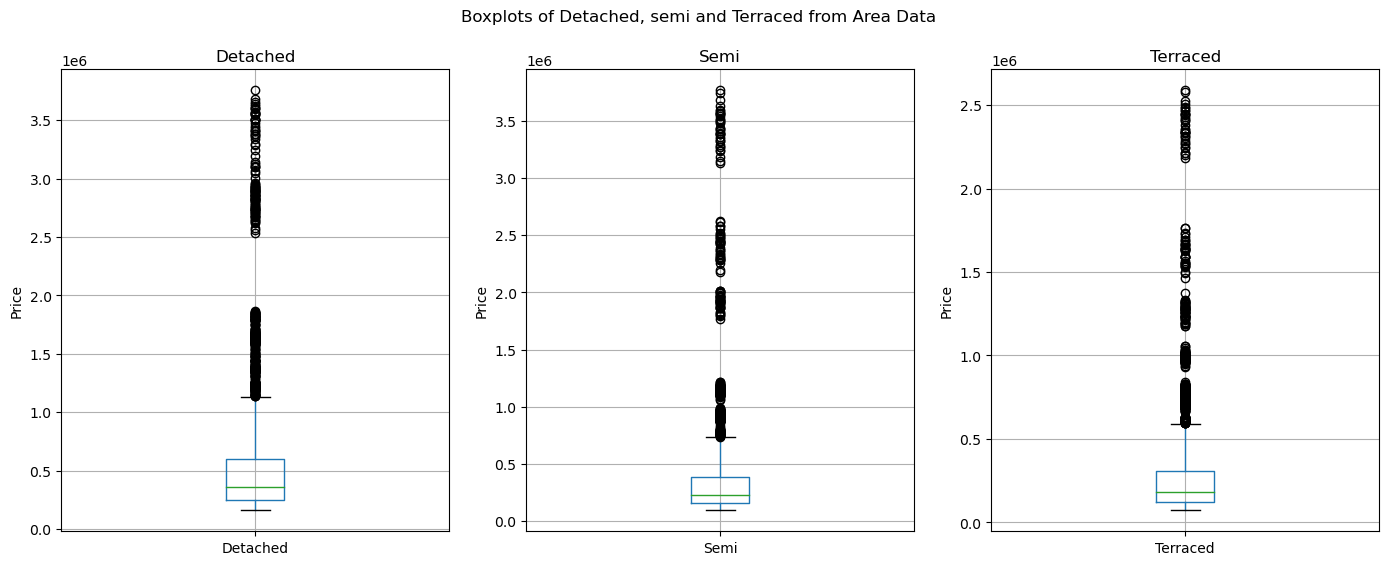

In [ ]:
# Creating boxplots to see the distribution of the columns with NaN values

fig, (b1,b2,b3) = plt.subplots(1,3,figsize = (17,6))

area_pp[['Detached']].boxplot(ax=b1)
area_pp[['Semi']].boxplot(ax=b2)
area_pp[['Terraced']].boxplot(ax=b3)

# Labeling plots
fig.suptitle('Boxplots of Detached, semi and Terraced from Area Data')
b1.set_title('Detached')
b2.set_title('Semi')
b3.set_title('Terraced')
b1.set_ylabel('Price')
b2.set_ylabel('Price')
b3.set_ylabel('Price')


Reasoning for replacing NaN values with the median

NaN values stand for not a number, and is a data type used to represent any value that is undefined in the dataset. There are 3 columns in the area data set that contain NaN values which need to be removed before we can start calculating rolling statistics and conduct out Chi-squared test at later stages of this project.

Replacing the NaN values using the mean and the median are two options for removing NaN values. The boxplots of Detached, Semi and Terraced columns of the area dataframe show that the data is highly skewed. There are many data points that behave like outliers and thus have the potential to significantly impact the mean, which means replacing NaNs with the mean is not a viable option. Although, the median is less susceptible to being impacted by skewed data, I will be removing the rows that contain NaN values using the drop method instead.

Since, the data we are handling is time series, dropping rows with NaN values will be more appropriate than replacing it with either the mean or the median. For example, both the mean and median are calculated from all of the data collected across the 3 year period, thus giving us an average or median value for the entire dataset rather than at specific times. Since time is the index when calculating statistics we want them to be rolling statistics, that are used to assess the model's stability over time. As this the process of replacing NaN values with the median or the mean is too complex, dropping the NaN rows is better.

However, it is worth noting that our dataset is quite small and in total between the area and region dataframes there are only 5760 rows of data. Therefore removing NaN values and thus removing entire rows may
have the potential to negatively impact out analysis in later sections of this project as their is the potential to lose too much information and thus reduce the reliability of our analysis. Since the NaN values occur in the detached, Semi and terraced columns of which only detached is being used for analysis in this project, we could argue that dropping NaN values only occuring in the detached column could solve the NaN value issues without resulting in too much information loss.



Dropping rows with NaN values

In [ ]:
# Dropping rows with NaN values

area_pp.dropna(subset=['Detached'],inplace=True)

In [ ]:
# Checking that NaNs have been successfully removed

area_pp.isna().sum()

Area             0
Code             0
Detached         0
Semi             0
Terraced         0
Flat             0
Month            0
AuthorityCode    0
AuthorityName    0
RegionCode       0
RegionName       0
dtype: int64

The NaNs have been successfully removed and no NaN values remain in the area dataframe

In [ ]:
# Setting the Month as index for region and area dataframes

region_pp = region_pp.set_index(['Month'])
region_pp

,Region,Code,Detached,Semi,Terraced,Flat
Month,,,,,,
2016-09-01,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412
2016-10-01,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508
2016-11-01,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739
2016-12-01,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119
2017-01-01,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214
...,...,...,...,...,...,...
2019-04-01,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010
2019-05-01,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930
2019-06-01,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830


## Part 2.2: Trends

In the following section I will be using the region data to look at some trends

In [ ]:
# Checking the number of unique regions and the number of occurances in the region dataframe

region_pp['Region'].value_counts()

North East                  36
North West                  36
Yorkshire and The Humber    36
East Midlands               36
West Midlands Region        36
East of England             36
London                      36
South East                  36
South West                  36
Name: Region, dtype: int64

There are 9 distinct regions in the regions dataframe. I will be plotting the trends of the prices of flats and detached properties over the (36 month) 3 year period in all 9 regions. Therefore, I will be creating 9 separate dataframes that contain the data for each of the 9 regions.

Sorting the region data by region

In [ ]:
# Creating dataframe of region North east

reg_NE = region_pp[region_pp['Region']=='North East']

# Creating dataframe of region North West

reg_NW = region_pp[region_pp['Region']=='North West']

# Creating dataframe of region Yorkshire and The Humber

reg_YH = region_pp[region_pp['Region']=='Yorkshire and The Humber']

# Creating dataframe of region East Midlands

reg_EM = region_pp[region_pp['Region']=='East Midlands']

# Creating dataframe of region West Midlands Region

reg_WM = region_pp[region_pp['Region']=='West Midlands Region']

# Creating dataframe of region East of England

reg_EE= region_pp[region_pp['Region']=='East of England']

# Creating dataframe of region London

reg_L= region_pp[region_pp['Region']=='London']

# Creating dataframe of region South East

reg_SE= region_pp[region_pp['Region']=='South East']

# Creating dataframe of region South West

reg_SW= region_pp[region_pp['Region']=='South West']


**Code used to check that regions were successfully separated by region into separate dataframes**

In [ ]:
# Checking the number of datapoints in region North East to see if the sorting was successful

#len(reg_NE)
#reg_NE.head()

,Region,Code,Detached,Semi,Terraced,Flat
Month,,,,,,
2016-09-01,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412
2016-10-01,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508
2016-11-01,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739
2016-12-01,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119
2017-01-01,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214


In [ ]:
# Checking the number of datapoints in region North West to see if the sorting was successful

#len(reg_NW)
#reg_NW.head()

,Region,Code,Detached,Semi,Terraced,Flat
Month,,,,,,
2016-09-01,North West,E12000002,258657.9184,158034.4748,114895.4436,111773.3041
2016-10-01,North West,E12000002,257093.7678,156836.0437,112523.7548,111361.0853
2016-11-01,North West,E12000002,259290.4851,157668.7867,113849.5359,113084.2642
2016-12-01,North West,E12000002,258008.8847,157199.6875,114227.4014,112851.7219
2017-01-01,North West,E12000002,258860.3637,157402.9671,113496.0295,112719.2760


In [ ]:
# Checking the number of datapoints in region Yorkshire and The Humber to see if the sorting was successful

#len(reg_YH)
#reg_YH.head()

,Region,Code,Detached,Semi,Terraced,Flat
Month,,,,,,
2016-09-01,Yorkshire and The Humber,E12000003,241975.9618,148613.3140,119687.6395,108879.0246
2016-10-01,Yorkshire and The Humber,E12000003,242695.6641,148355.7717,119180.9557,109218.3135
2016-11-01,Yorkshire and The Humber,E12000003,245728.3337,149078.1710,119346.4773,110103.4640
2016-12-01,Yorkshire and The Humber,E12000003,246480.2363,150102.2480,121108.0830,111327.6253
2017-01-01,Yorkshire and The Humber,E12000003,241975.4125,146964.4340,117390.4290,108476.2985


In [ ]:
# Checking the number of datapoints in region East Midlands to see if the sorting was successful

#len(reg_EM)
#reg_EM.head()

,Region,Code,Detached,Semi,Terraced,Flat
Month,,,,,,
2016-09-01,East Midlands,E12000004,253192.5738,158410.6007,131160.2422,105719.7658
2016-10-01,East Midlands,E12000004,253113.5644,157769.0764,129650.2951,105677.9102
2016-11-01,East Midlands,E12000004,256399.0387,158723.5156,130259.0869,106242.3931
2016-12-01,East Midlands,E12000004,256072.6841,159433.3460,131625.9761,107565.5240
2017-01-01,East Midlands,E12000004,254846.8515,158021.4144,129572.9950,105732.0816


In [ ]:
# Checking the number of datapoints in region West Midlands to see if the sorting was successful

#len(reg_WM)
#reg_WM.head()

,Region,Code,Detached,Semi,Terraced,Flat
Month,,,,,,
2016-09-01,West Midlands Region,E12000005,293131.3321,172332.5497,140912.5248,117955.4468
2016-10-01,West Midlands Region,E12000005,291204.5534,170387.6402,138928.8441,117725.9394
2016-11-01,West Midlands Region,E12000005,295637.5125,172430.8526,140335.8252,119197.8097
2016-12-01,West Midlands Region,E12000005,294605.1742,172722.2818,141307.0132,119877.7064
2017-01-01,West Midlands Region,E12000005,294141.4508,171658.9435,139989.7655,118455.7214


In [ ]:
# Checking the number of datapoints in region East of England to see if the sorting was successful

#len(reg_EE)
#reg_EE.head()

,Region,Code,Detached,Semi,Terraced,Flat
Month,,,,,,
2016-09-01,East of England,E12000006,405841.8655,275134.0190,229009.1052,186766.3869
2016-10-01,East of England,E12000006,406573.8362,274703.6049,227212.6150,187073.2483
2016-11-01,East of England,E12000006,408206.6914,274903.5297,227796.9214,187968.8368
2016-12-01,East of England,E12000006,411744.8900,276943.7443,230313.0939,189962.0231
2017-01-01,East of England,E12000006,410560.0190,277070.8068,229362.9788,188491.7502


In [ ]:
# Checking the number of datapoints in region London to see if the sorting was successful

#len(reg_L)
#reg_L.head()

,Region,Code,Detached,Semi,Terraced,Flat
Month,,,,,,
2016-09-01,London,E12000007,883706.1247,565375.9433,486660.2797,416967.2409
2016-10-01,London,E12000007,883336.1414,565976.7252,482452.3198,417531.8233
2016-11-01,London,E12000007,886552.8418,562092.6199,480835.8854,418659.5180
2016-12-01,London,E12000007,887004.7033,562271.8750,483478.8270,419936.6675
2017-01-01,London,E12000007,893279.1773,568910.7898,487710.1884,421833.8474


In [ ]:
# Checking the number of datapoints in region South East to see if the sorting was successful

#len(reg_SE)
#reg_SE.head()

,Region,Code,Detached,Semi,Terraced,Flat
Month,,,,,,
2016-09-01,South East,E12000008,527197.4444,325098.3519,255985.4241,196714.1534
2016-10-01,South East,E12000008,528135.7832,325291.9828,255471.2870,198278.3558
2016-11-01,South East,E12000008,531277.2444,324686.0949,255056.7870,197356.0292
2016-12-01,South East,E12000008,530752.5402,325632.8313,257083.6632,198772.3379
2017-01-01,South East,E12000008,537855.6757,330327.7704,259964.1891,200549.5387


In [ ]:
# Checking the number of datapoints in region South West to see if the sorting was successful

#len(reg_SW)
#reg_SW.head()

,Region,Code,Detached,Semi,Terraced,Flat
Month,,,,,,
2016-09-01,South West,E12000009,366226.9314,238112.5076,197260.0998,157517.6835
2016-10-01,South West,E12000009,362947.1527,236751.6536,195449.6852,157743.8376
2016-11-01,South West,E12000009,368767.4806,237683.2488,195720.4548,158186.7121
2016-12-01,South West,E12000009,365481.7859,236369.0155,195804.8051,158274.0803
2017-01-01,South West,E12000009,369559.0554,239541.7482,197661.2783,159690.6634


### Plotting the trends in property prices across different regions between September 2016 and August 2019

Text(0, 0.5, 'Property Price')

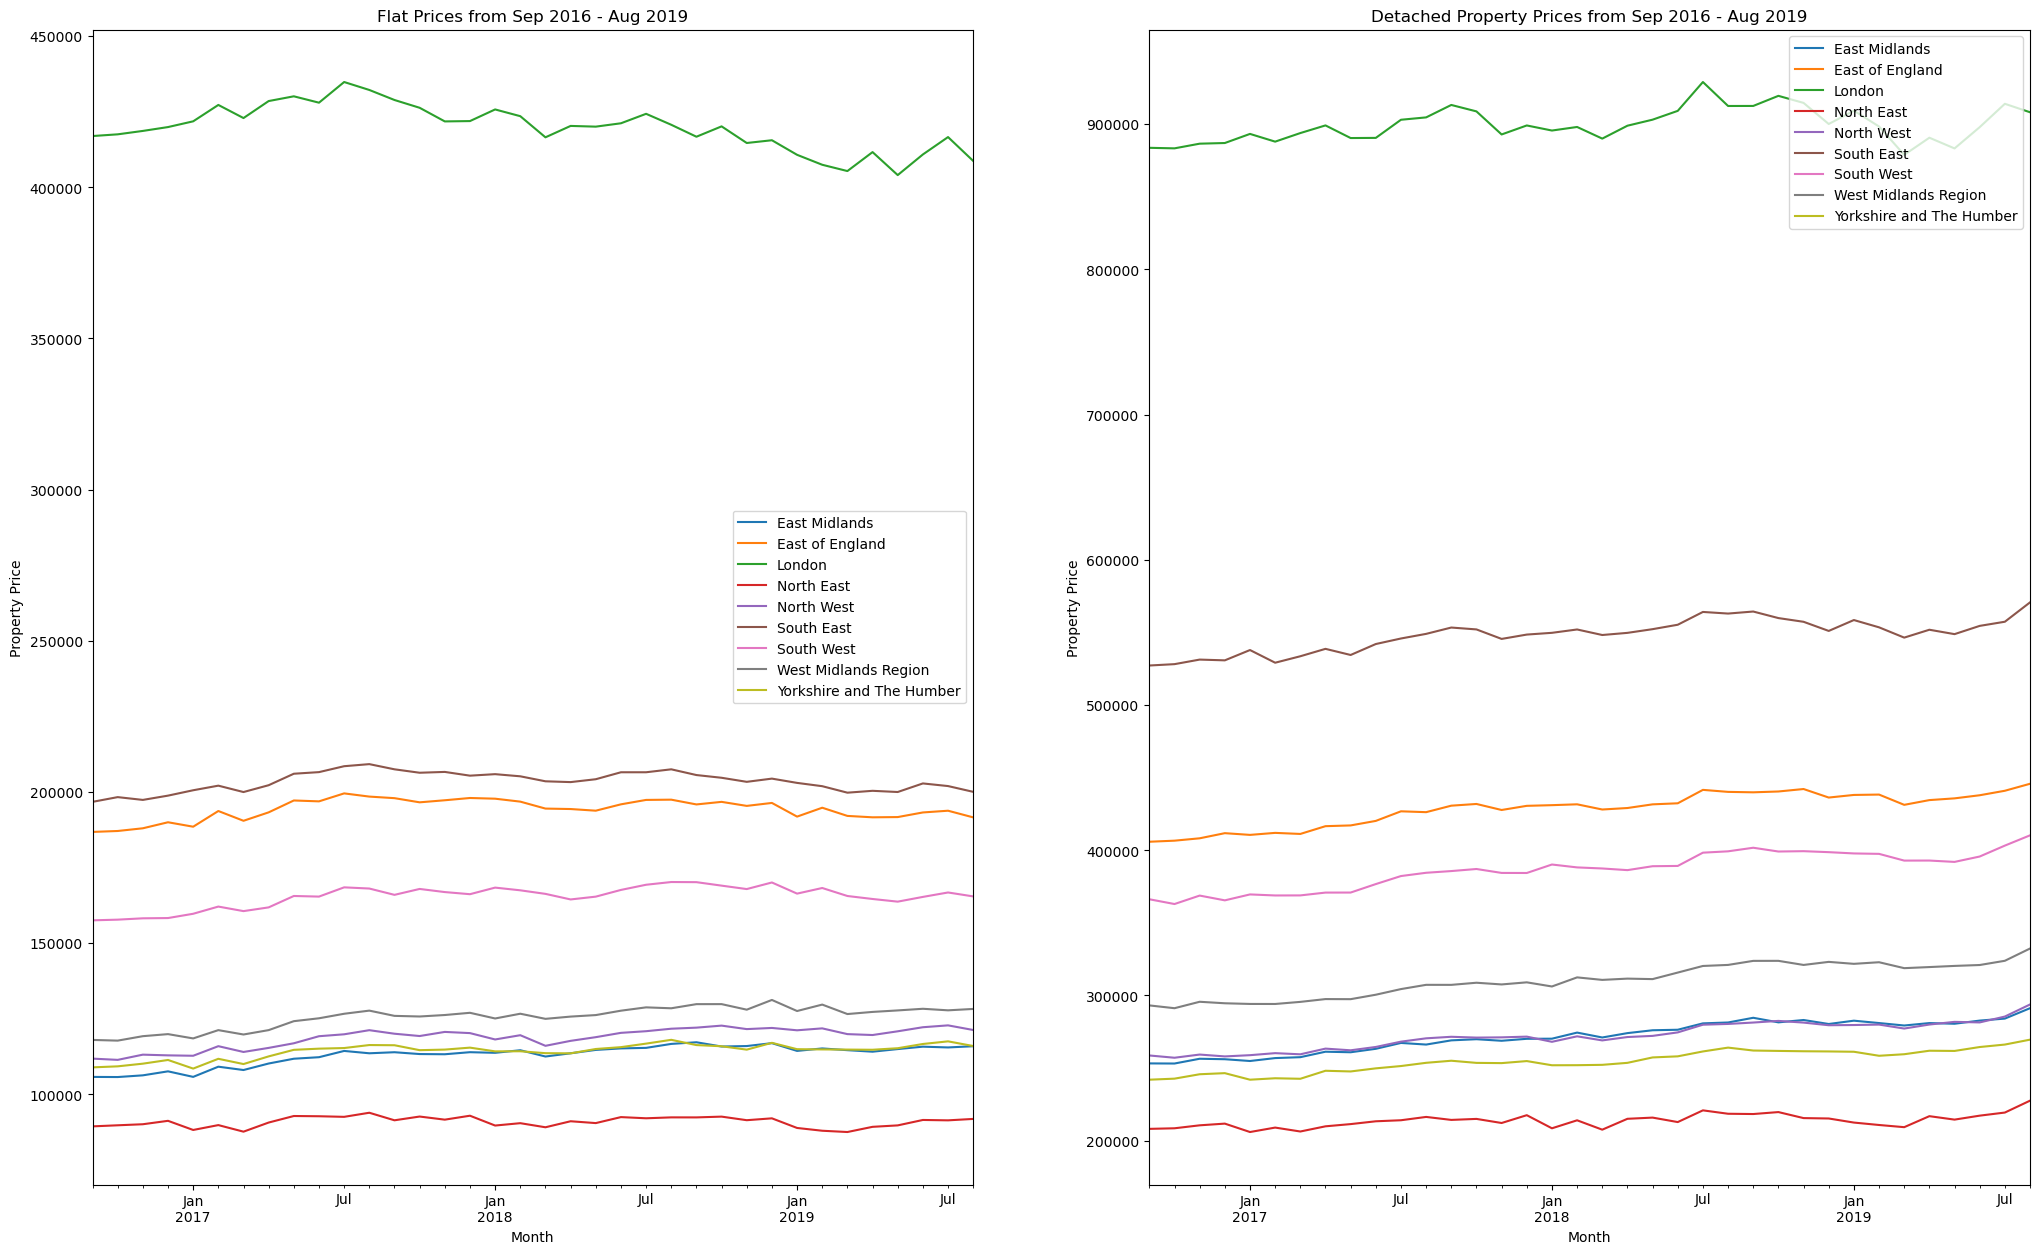

In [ ]:
# Plotting the trends by region

fig, (a1,a2) = plt.subplots(1,2, figsize = (25,15),sharey=False, )

# Plotting trends of flat prices
region_pp.groupby('Region')['Flat'].plot(ax=a1, legend=True)

# Plotting trends of detached property prices
region_pp.groupby('Region')['Detached'].plot(ax=a2, legend=True)

# Adding titles to my graphs
a1.set_title('Flat Prices from Sep 2016 - Aug 2019')
a1.set_ylabel('Property Price')
a2.set_title('Detached Property Prices from Sep 2016 - Aug 2019')
a2.set_ylabel('Property Price')

### Comments on property prices across different regions between September 2016 and August 2019

1) The figure above shows that across all 9 regions Detached Property prices are higher than the Flat prices of the same region.
2) Furthermore, although the exact rolling average price calculations have not been calculated, from looking at the graph it seems as though the price of a Detached Property is generally around 2 times higher than the price of a flat within the same region.
3) There is a general trend of increasing property prices over the 3 year period regardless of the type of property or its region. However, the only exception to this trend is Flats in London which seems to be decreasing in price over the 3 year period.
4) Properties in London are significantly more expensive that properties in other regions. (Almost/roughly 2 times more expensive than the second most expensive region which is the South East)
5) Although detached properties are generally more expensive than Flats, London Flats are more expensive than more than the Detached properties of all regions bar London and the South East.

The prices of Flats ranked from Most to least expensive by region are:

1) London
2) South East
3) East of England
4) South West
5) West Midlands
6) North West
7) Yorkshire and The Humber
8) East Midlands
9) North East

The prices of Detached properties ranked from Most to least expensive by region are:

1) London
2) South East
3) East of England
4) South West
5) West Midlands
6) North West
7) East Midlands
8) Yorkshire and The Humber
9) North East<br>


As you can see, on the whole, the ranking of regions for most expensive to least expensive based of Flat prices are very similar, almost identical to the ranking based on Detached property prices. The fact that the rankings of prices by region are so similar across the two property types are indicative of the fact that regions have greater effect on determining the price of a property than the type of the property.

The exception being Yorkshire and The Humber, and East Midlands, where Flats are more expensive in Yorkshire and yet Detached properties are more expensive in the East midlands. However, upon closer inspection of the graphs the prices of properties in the two regions are so close in values and plot that it is not indicative of a significant difference in price and hence we do not have significant evidence to oppose the observation I have made above.



### Plotting Flat and Detached Property prices by Region

<AxesSubplot:title={'center':'Flat and Detached Property Prices in the North East'}, xlabel='Month'>

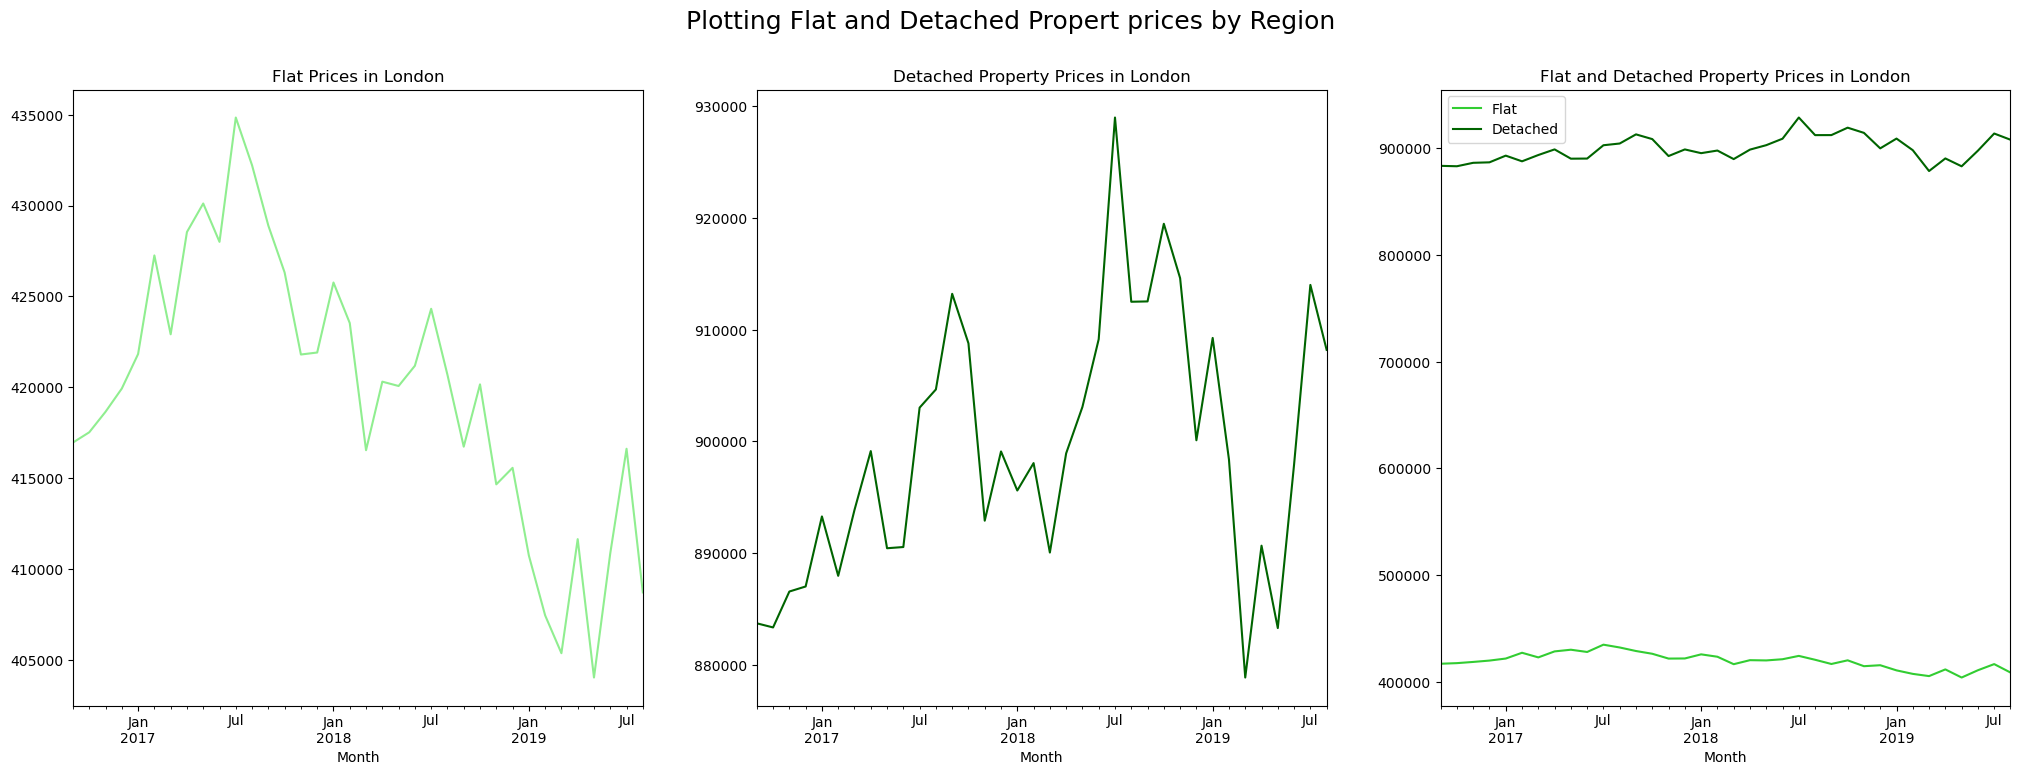

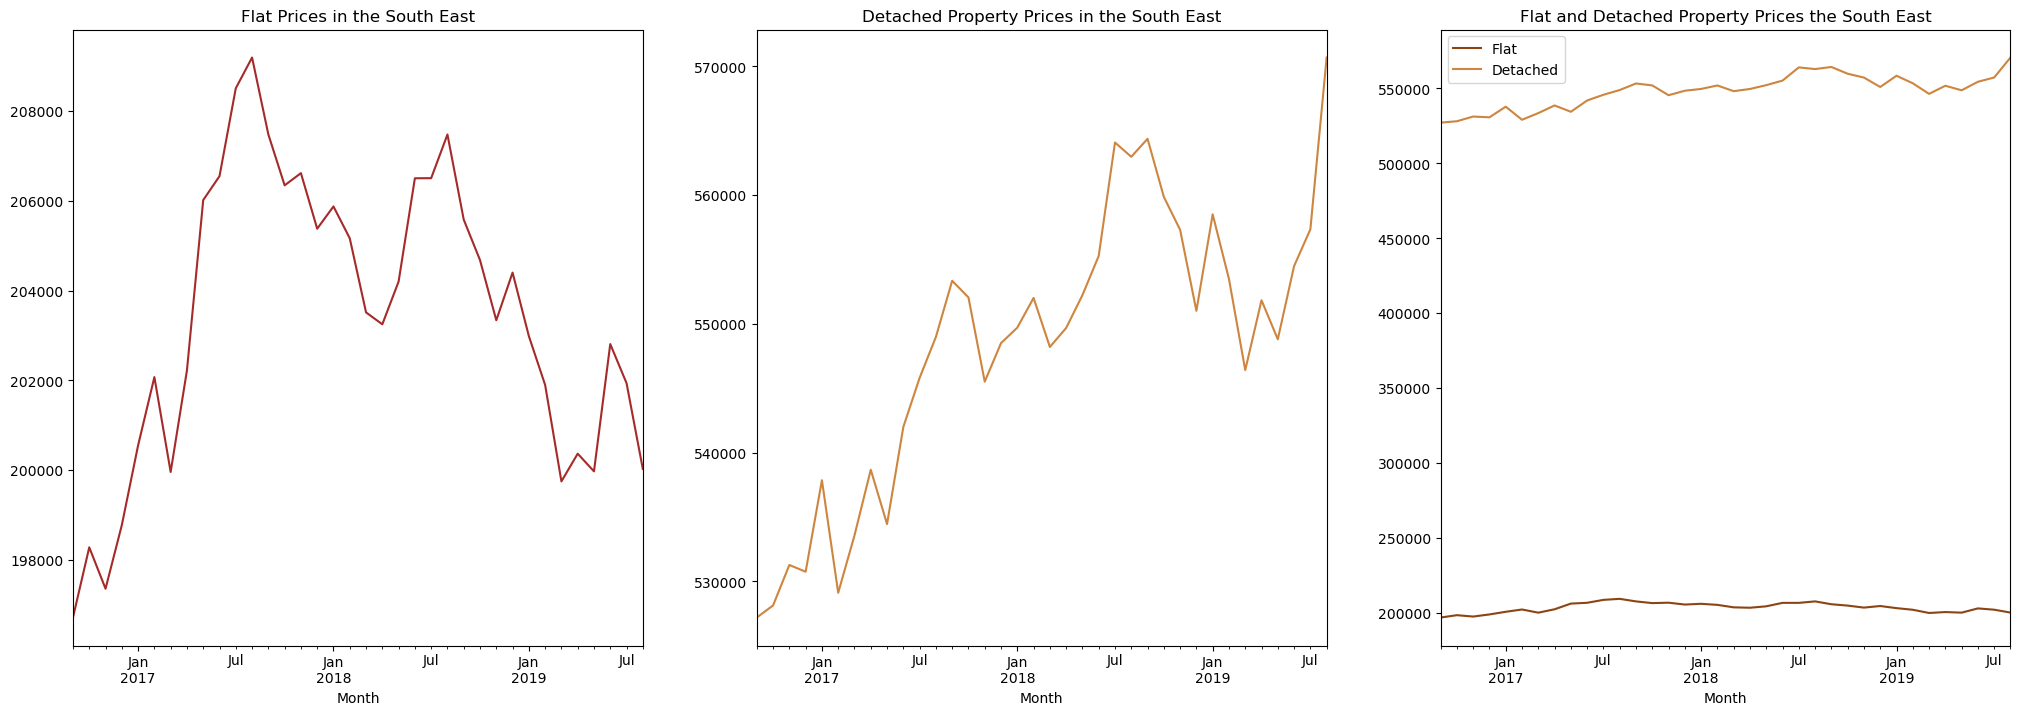

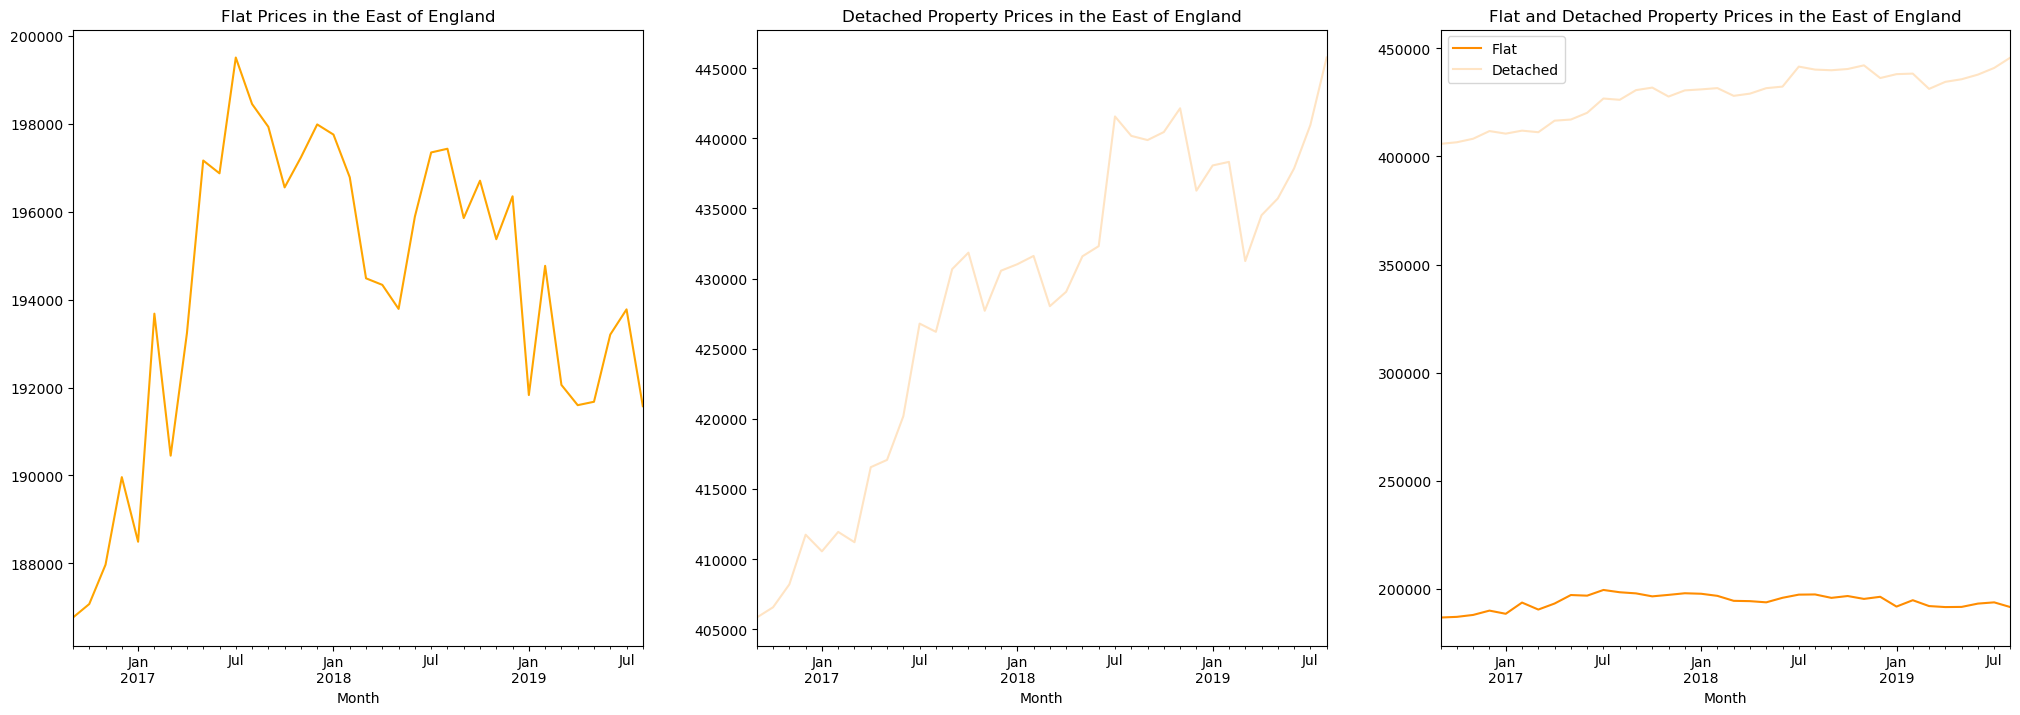

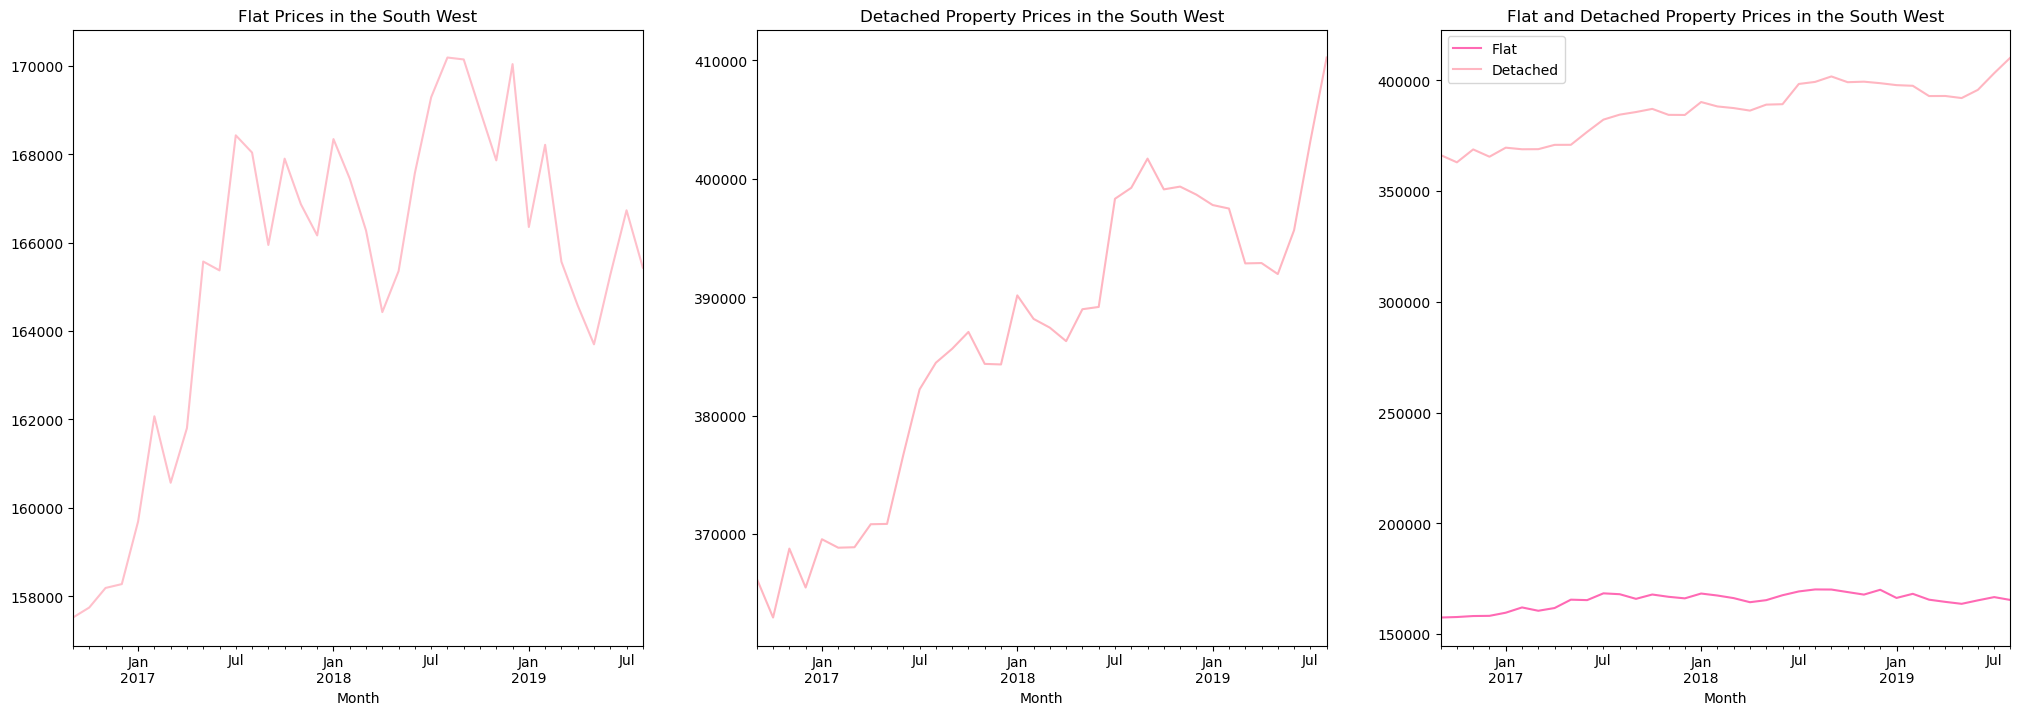

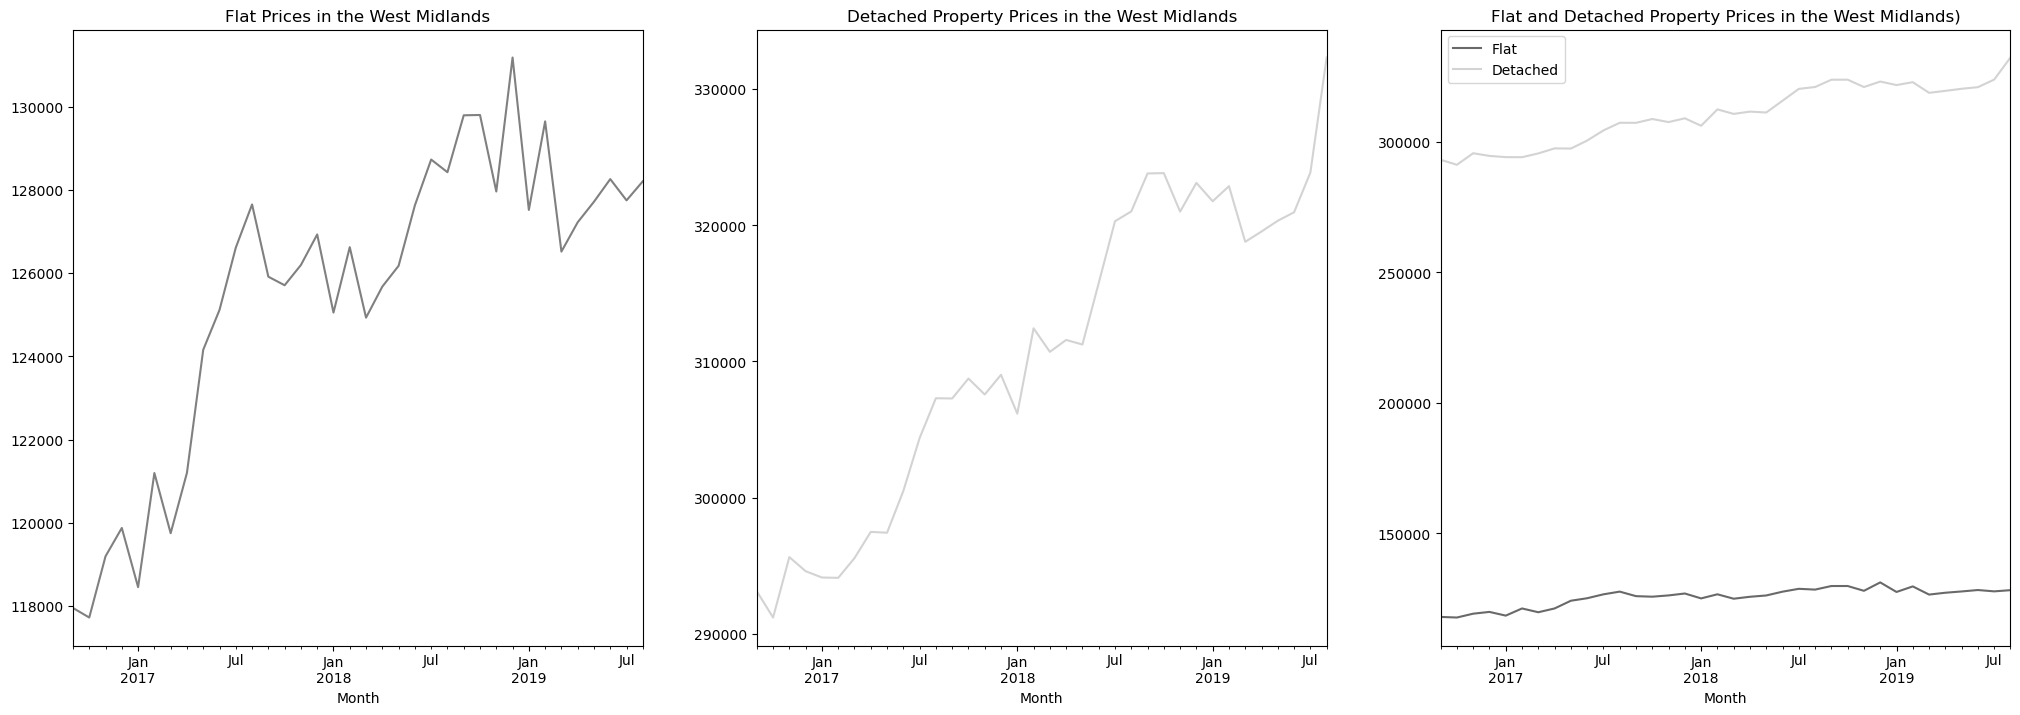

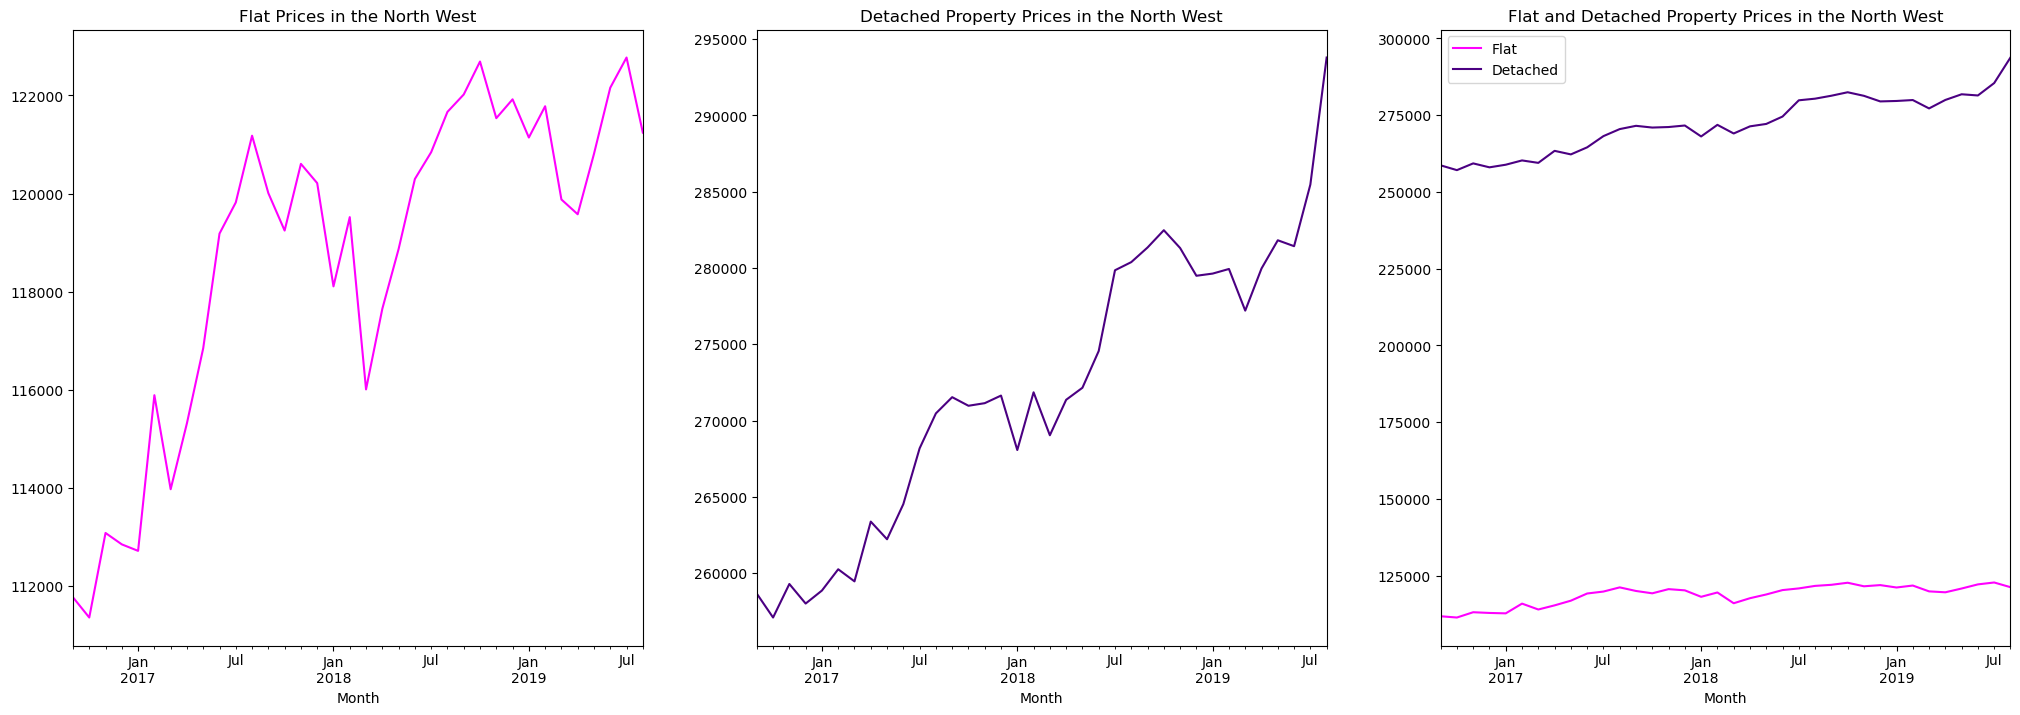

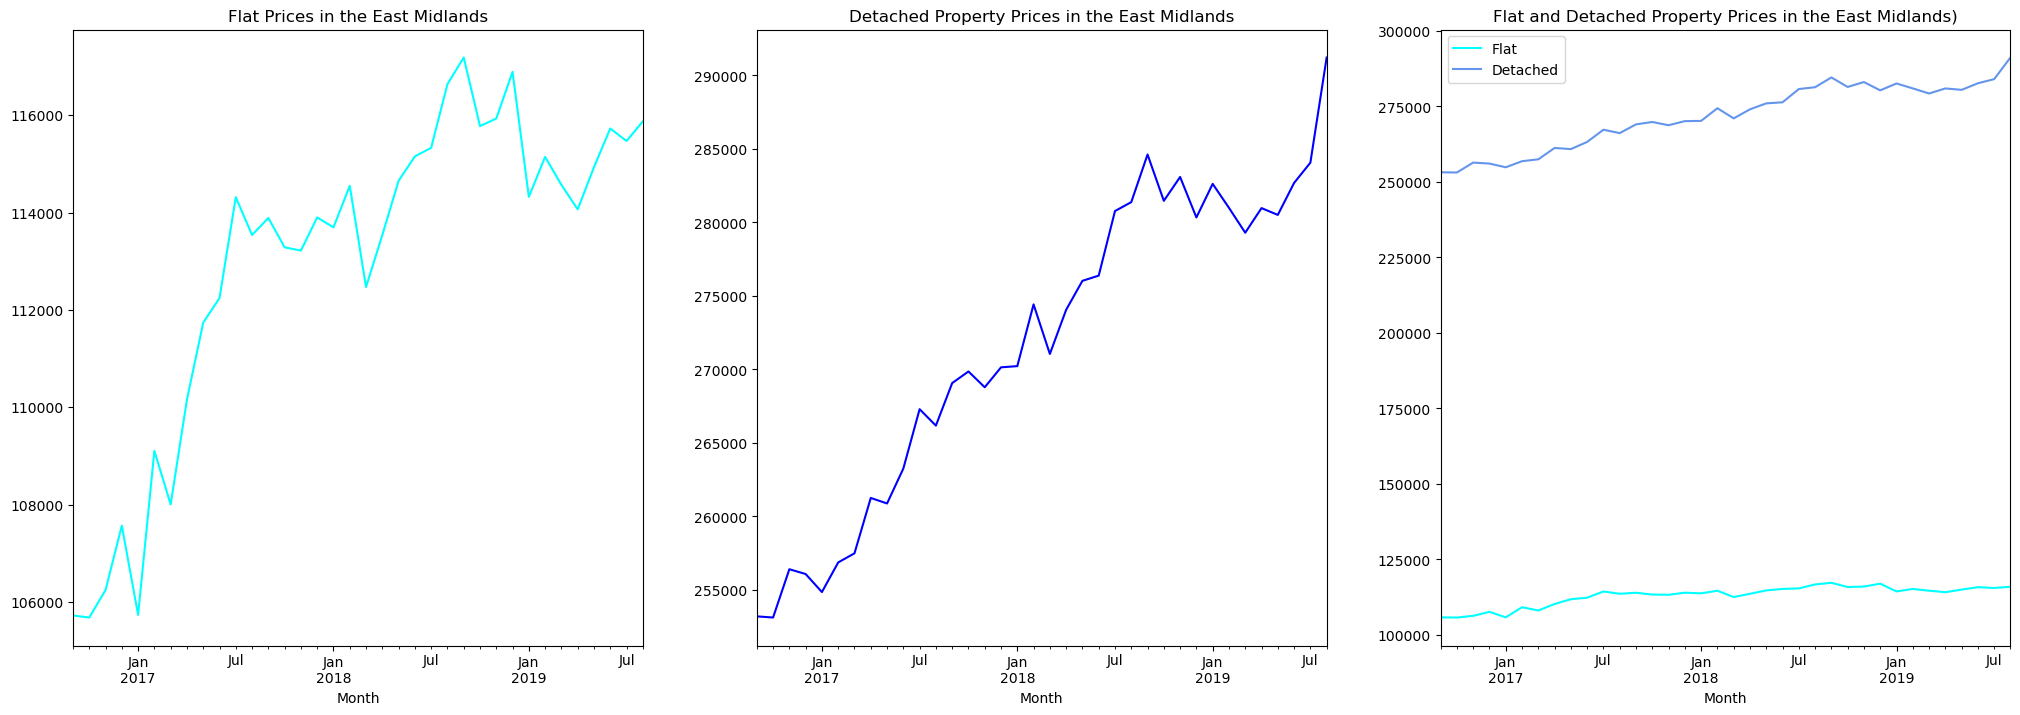

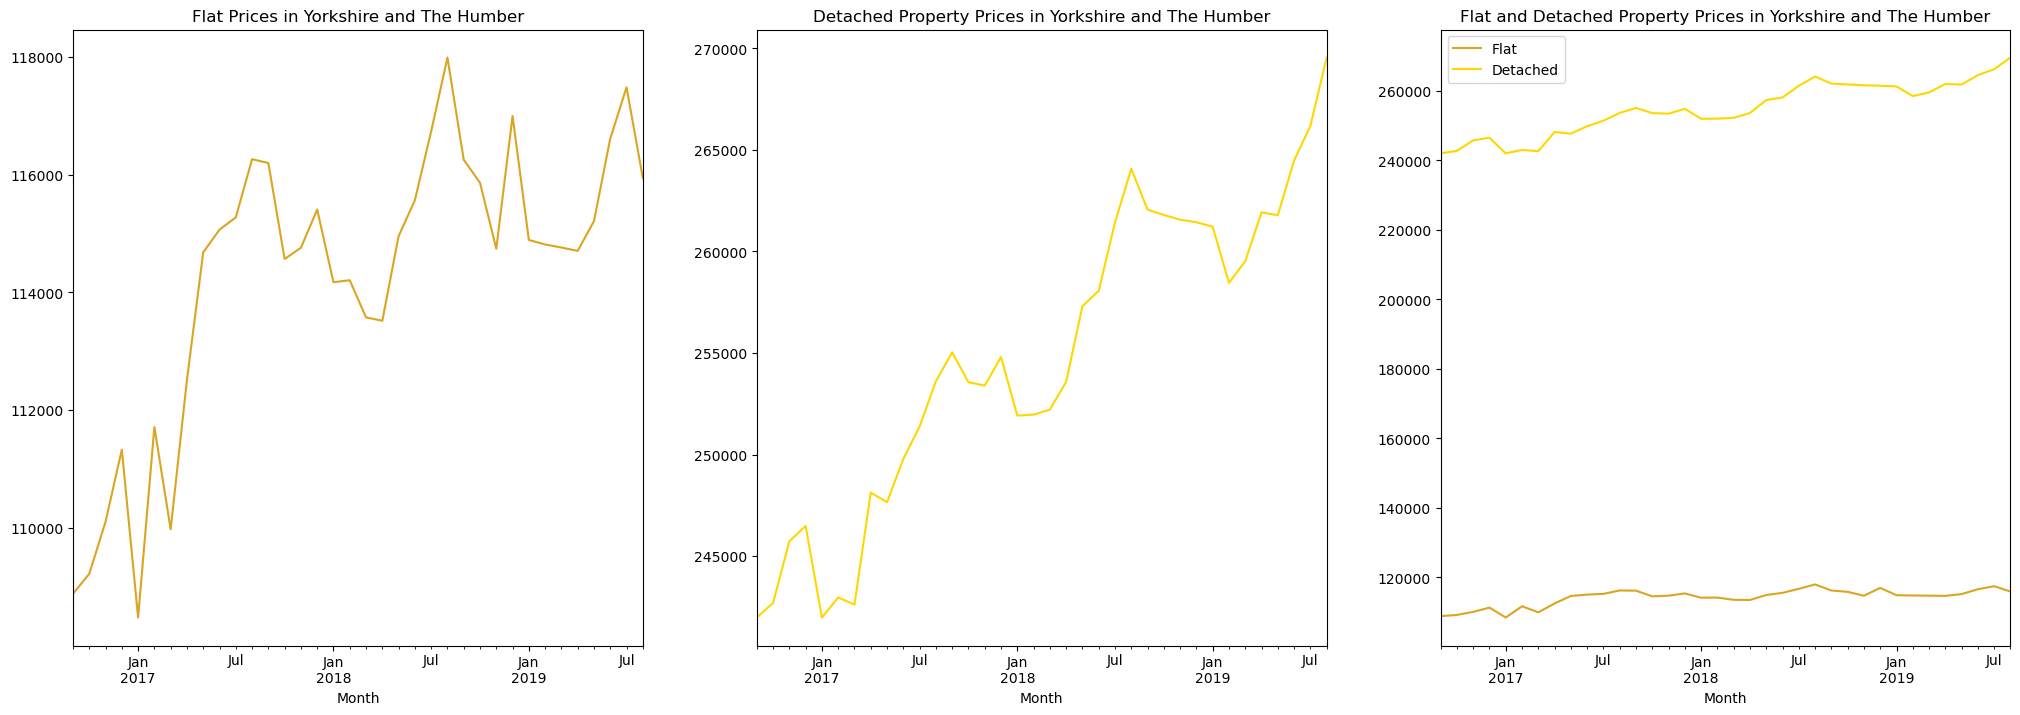

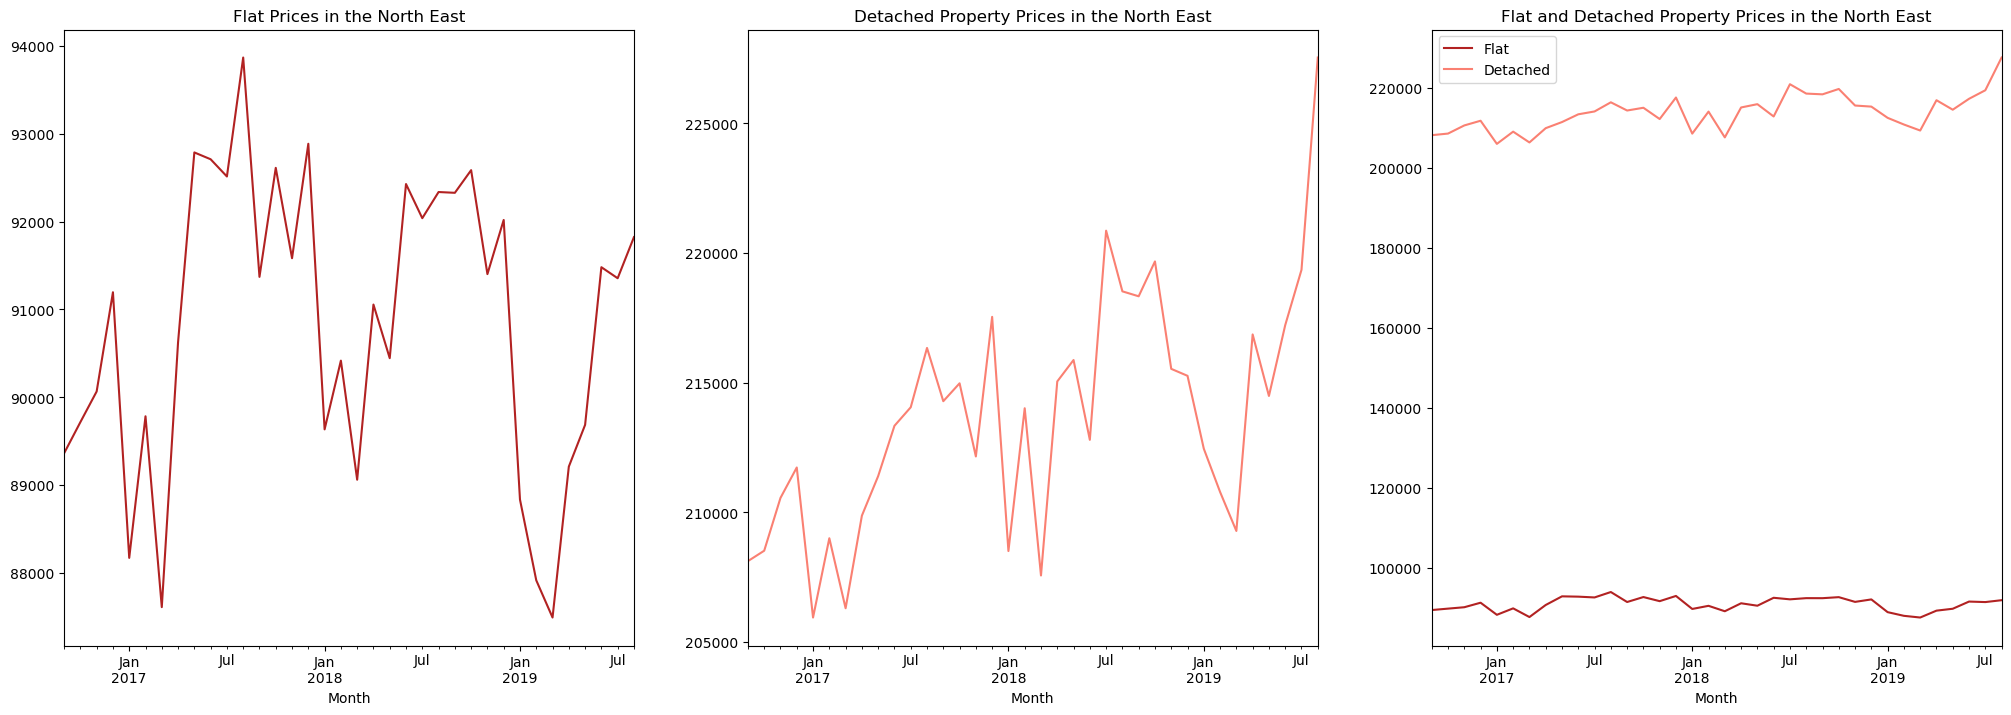

In [ ]:
# Plotting London Flat and Detached Property prices

fig, (a1, a2, a3) = plt.subplots(nrows=1, ncols=3, figsize=(25,8))
fig.suptitle('Plotting Flat and Detached Propert prices by Region', fontsize = 18)

reg_L['Flat'].plot(use_index=True, ax=a1, color='lightgreen', title='Flat Prices in London')
reg_L['Detached'].plot(use_index=True, ax=a2, color='darkgreen', title='Detached Property Prices in London')
reg_L.plot(use_index=True, y=['Flat', 'Detached'], color=['limegreen', 'darkgreen'], title='Flat and Detached Property Prices in London', ax=a3)

# Plotting South East Flat and Detached Property prices

fig, (a1, a2, a3) = plt.subplots(nrows=1, ncols=3, figsize=(25,8))
reg_SE['Flat'].plot(use_index=True, ax=a1, color='brown', title='Flat Prices in the South East')
reg_SE['Detached'].plot(use_index=True, ax=a2, color='peru', title='Detached Property Prices in the South East')
reg_SE.plot(use_index=True, y=['Flat', 'Detached'], color=['saddlebrown', 'peru'], title='Flat and Detached Property Prices the South East', ax=a3)

# Plotting East of England Flat and Detached Property prices

fig, (a1, a2, a3) = plt.subplots(nrows=1, ncols=3, figsize=(25,8))
reg_EE['Flat'].plot(use_index=True, ax=a1, color='orange', title='Flat Prices in the East of England')
reg_EE['Detached'].plot(use_index=True, ax=a2, color='bisque', title='Detached Property Prices in the East of England')
reg_EE.plot(use_index=True, y=['Flat', 'Detached'], color=['darkorange', 'bisque'], title='Flat and Detached Property Prices in the East of England', ax=a3)

# Plotting South West Flat and Detached Property prices

fig, (a1, a2, a3) = plt.subplots(nrows=1, ncols=3, figsize=(25,8))
reg_SW['Flat'].plot(use_index=True, ax=a1, color='pink', title='Flat Prices in the South West')
reg_SW['Detached'].plot(use_index=True, ax=a2, color='lightpink', title='Detached Property Prices in the South West')
reg_SW.plot(use_index=True, y=['Flat', 'Detached'], color=['hotpink', 'lightpink'], title='Flat and Detached Property Prices in the South West', ax=a3)

# Plotting West Midlands and Detached Property prices

fig, (a1, a2, a3) = plt.subplots(nrows=1, ncols=3, figsize=(25,8))
reg_WM['Flat'].plot(use_index=True, ax=a1, color='grey', title='Flat Prices in the West Midlands')
reg_WM['Detached'].plot(use_index=True, ax=a2, color='lightgrey', title='Detached Property Prices in the West Midlands')
reg_WM.plot(use_index=True, y=['Flat', 'Detached'], color=['dimgrey', 'lightgrey'], title='Flat and Detached Property Prices in the West Midlands)', ax=a3)

# Plotting North West and Detached Property prices

fig, (a1, a2, a3) = plt.subplots(nrows=1, ncols=3, figsize=(25,8))
reg_NW['Flat'].plot(use_index=True, ax=a1, color='magenta', title='Flat Prices in the North West')
reg_NW['Detached'].plot(use_index=True, ax=a2, color='indigo', title='Detached Property Prices in the North West')
reg_NW.plot(use_index=True, y=['Flat', 'Detached'], color=['magenta', 'indigo'], title='Flat and Detached Property Prices in the North West', ax=a3)

# Plotting East Midlands Flat and Detached Property prices

fig, (a1, a2, a3) = plt.subplots(nrows=1, ncols=3, figsize=(25,8))
reg_EM['Flat'].plot(use_index=True, ax=a1, color='cyan', title='Flat Prices in the East Midlands')
reg_EM['Detached'].plot(use_index=True, ax=a2, color='blue', title='Detached Property Prices in the East Midlands')
reg_EM.plot(use_index=True, y=['Flat', 'Detached'], color=['cyan', 'cornflowerblue'], title='Flat and Detached Property Prices in the East Midlands)', ax=a3)

# Plotting Yorkshire and The Humber and Detached Property prices

fig, (a1, a2, a3) = plt.subplots(nrows=1, ncols=3, figsize=(25,8))
reg_YH['Flat'].plot(use_index=True, ax=a1, color='goldenrod', title='Flat Prices in Yorkshire and The Humber')
reg_YH['Detached'].plot(use_index=True, ax=a2, color='gold', title='Detached Property Prices in Yorkshire and The Humber')
reg_YH.plot(use_index=True, y=['Flat', 'Detached'], color=['goldenrod', 'gold'], title='Flat and Detached Property Prices in Yorkshire and The Humber', ax=a3)

# Plotting North East Flat and Detached Property prices

fig, (a1, a2, a3) = plt.subplots(nrows=1, ncols=3, figsize=(25,8))
reg_NE['Flat'].plot(use_index=True, ax=a1, color='firebrick', title='Flat Prices in the North East')
reg_NE['Detached'].plot(use_index=True, ax=a2, color='salmon', title='Detached Property Prices in the North East')
reg_NE.plot(use_index=True, y=['Flat', 'Detached'], color=['firebrick', 'salmon'], title='Flat and Detached Property Prices in the North East', ax=a3)



### Comments on Flat and Detached Property prices by region

**Volatility and drastic changes in prices**

1) Properties in London and the North east were the most volatile and contain the most dramatic upwards and downward spikes when compared to other regions. London is the most expensive region and The North East is the least expensive regions, which suggests that the regions on the two ends of the property price ranking are more susceptible to more sudden and drastic price changes than other regions.
2) The West Midlands, North West and East Midlands were amongst the least volatile regions and are also ranked mid-level in terms of how expensive the house prices were over the three year period in those regions. This is further evidence to suggest that the most and least expensive regions are prone to more volatile and dramatic price changes over the three year period, where as mid-expensive regions are less prone to volatility and drastic increases and decreases in price.
3) Generally, Flat prices were more volatile compared to Detached properties across all regions.
4) However, in London the Detached properties have the most drastic upward and downwards spikes, meaning that is the most volatile compared to all regions and property types.

Overall, these findings along with the findings of the previous section comparing Flat and Detached prices across the three years by region suggest that region has a greater influence to property price changes than property type.


**Other trends**

5) In London Flat prices decreased over the three year period and Detached property prices increased, and the general shape of the graphs suggest that in London Detached property prices increased in line with Flat price decreases and vice versa. This could be indicative of a possible negative correlation or link between the two property types in London.
6) Although, the shapes of the trends of flat prices differ across regions and are not identical many of the spike and pits often occur around the same time, aka are aligned and are of similar magnitude across regions. For example, generally across regions, flat prices increase from September 2016 and April 2017. Similarly almost all regions Flat prices peaked at August/September 2017, and there is a drastic pit in house prices around march 2018 that are relatively consistent in terms of magnitude across the regions. This could indicate that flat property prices are influenced by factors that can affect multiple regions at once, and having the same effect on price across the regions. eg: same negative or positive effect on price across regions.
7) Although the magnitude of price changes are different in Detached properties than in flats, many of the spikes and pits that occur in Flat prices also occur in Detached properties during the same periods of time. For example, the crash in property prices that were seen as a dip in the graph around March 2018 were also spotted on the graphs for Detached properties in all regions. Therefore, the variables that influence property prices across the 3 years, effect all regions and property types. However, due to the less volatile nature of Detached property prices the effects are less intense and have a lower magnitute than can be seen in Flat prices.

**Summary**

1) Regions on the top and bottom ends of the property price ranking are more susceptible to more frequent, sudden and drastic price changes than other regions.
2) Flat prices were more volatile compared to Detached properties across all regions.
3) Finding suggests that region has a greater influence to property price changes than property type.
4) The variables that influence property prices across the 3 years, effect all regions and property types, simultaneously.



### Using moving averages to see seasonal changes in Flat and Detached property prices by region

**Rationale of using moving averages to see seasonal changes in Flat and Detached property prices by Region**

By using a moving average of 90 days or 3 months to plot changes to property prices of Flats and Detached properties between September 2016-August 2019, I am able to break up each year into 4 segments and analyse seasonal changes in property prices. Using this method enables me to smooth price data, easily remove out random variations and produce visualisations that can be easily interpreted.








In [ ]:
# Creating a dataframe of rolling 3 month mean (seasonal) changes to Flat and Detached property prices

# Calculating 3 Month rolling average of Flat and Detached property prices

seasonal_ave ={
    'L_flat' : reg_L.loc[:,'Flat'].rolling('90D').mean(),
    'L_detached':reg_L.loc[:,'Detached'].rolling('90D').mean(),
    'SE_flat':reg_SE.loc[:,'Flat'].rolling('90D').mean(),
    'SE_detached':reg_SE.loc[:,'Detached'].rolling('90D').mean(),
    'EE_flat':reg_EE.loc[:,'Flat'].rolling('90D').mean(),
    'EE_detached':reg_EE.loc[:,'Detached'].rolling('90D').mean(),
    'SW_flat':reg_SW.loc[:,'Flat'].rolling('90D').mean(),
    'SW_detached':reg_SW.loc[:,'Detached'].rolling('90D').mean(),
    'WM_flat':reg_WM.loc[:,'Flat'].rolling('90D').mean(),
    'WM_detached':reg_WM.loc[:,'Detached'].rolling('90D').mean(),
    'NW_flat':reg_NW.loc[:,'Flat'].rolling('90D').mean(),
    'NW_detached':reg_NW.loc[:,'Detached'].rolling('90D').mean(),
    'EM_flat':reg_EM.loc[:,'Flat'].rolling('90D').mean(),
    'EM_detached':reg_EM.loc[:,'Detached'].rolling('90D').mean(),
    'Y_flat':reg_YH.loc[:,'Flat'].rolling('90D').mean(),
    'Y_detached':reg_YH.loc[:,'Detached'].rolling('90D').mean(),
    'NE_flat':reg_NE.loc[:,'Flat'].rolling('90D').mean(),
    'NE_detached':reg_NE.loc[:,'Detached'].rolling('90D').mean()}


# Creating a dataframe called seasonal containing seasonal average changes to Flat and Detached property prices

seasonal = pd.DataFrame(data = seasonal_ave)


<AxesSubplot:title={'center':'North East Detached'}, xlabel='Month'>

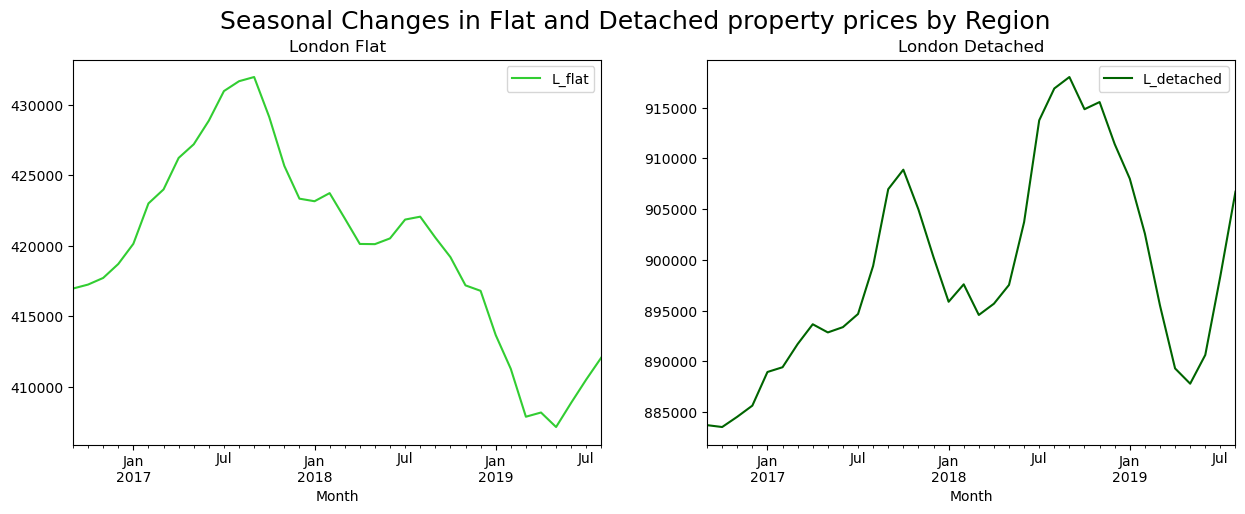

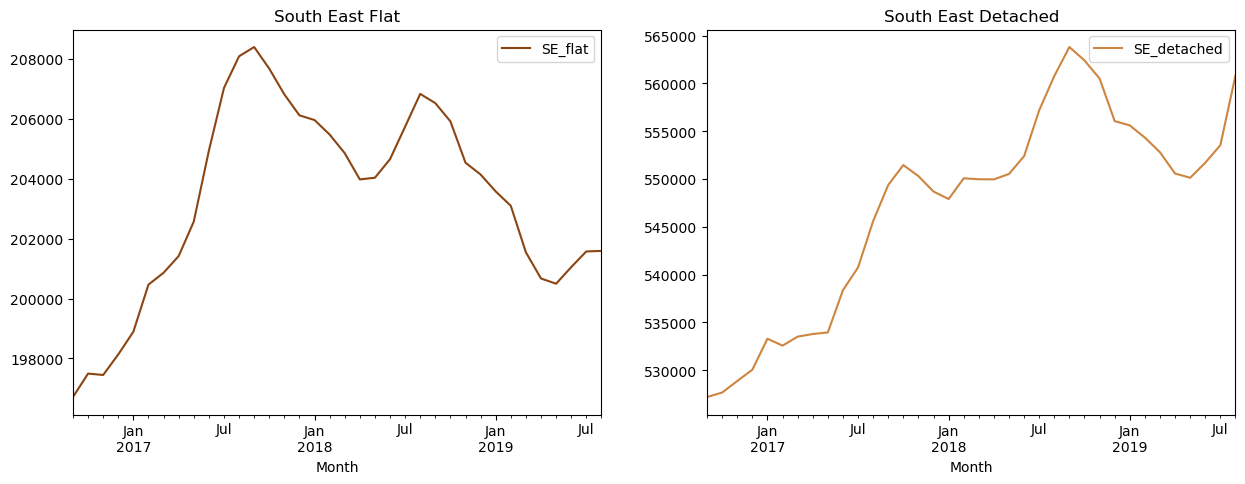

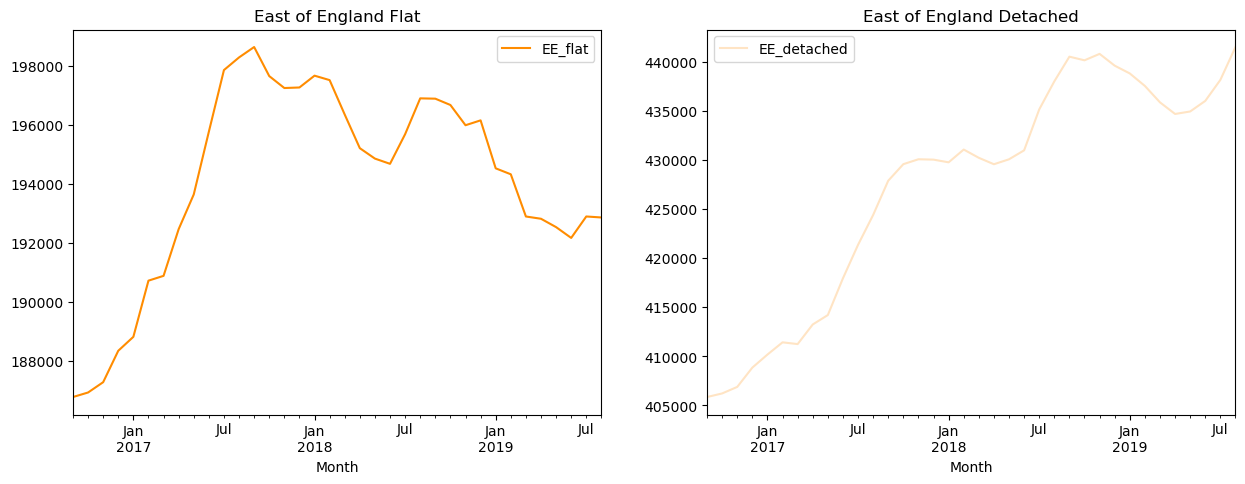

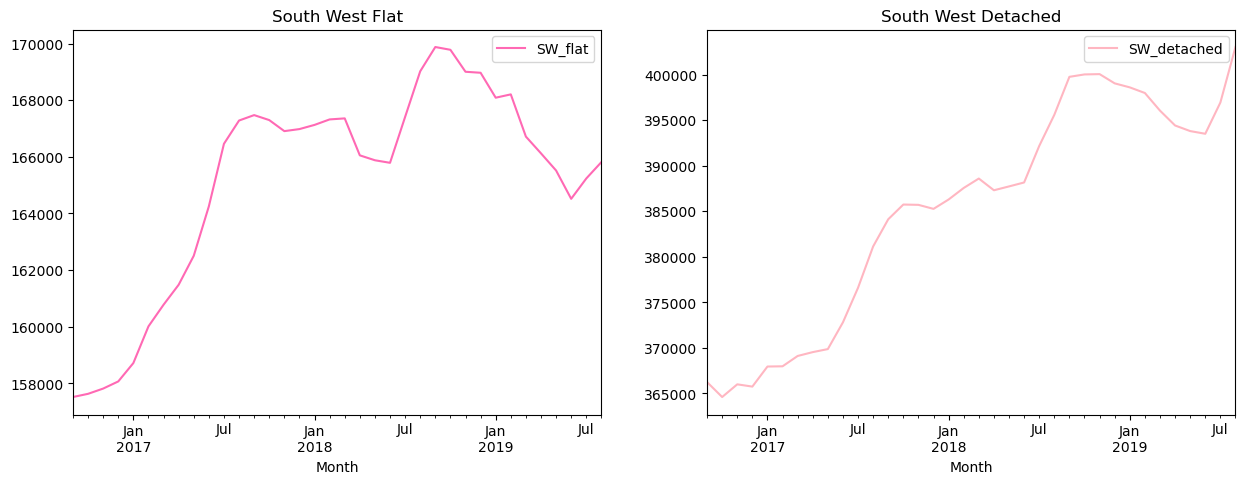

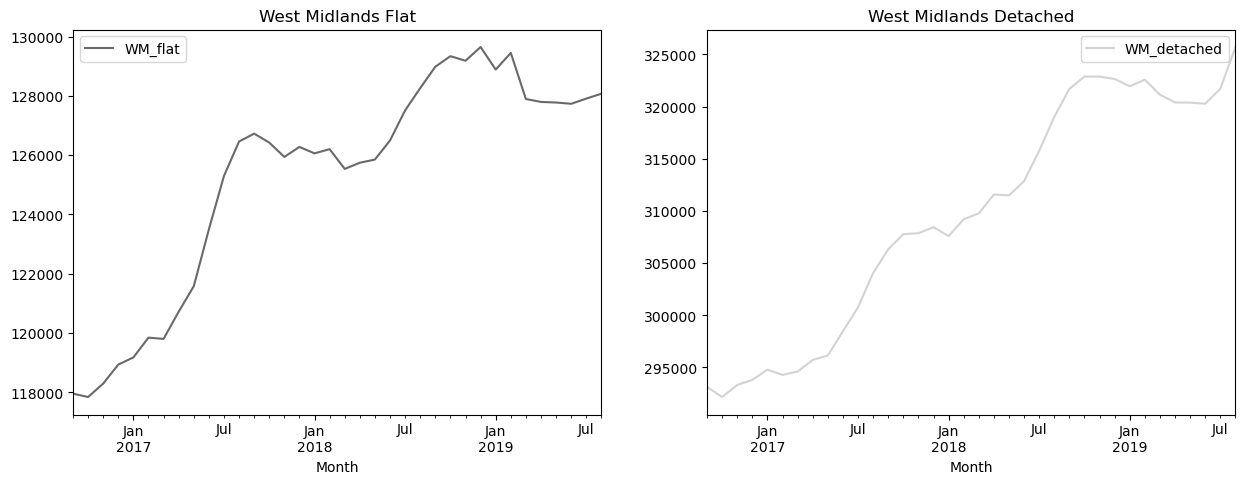

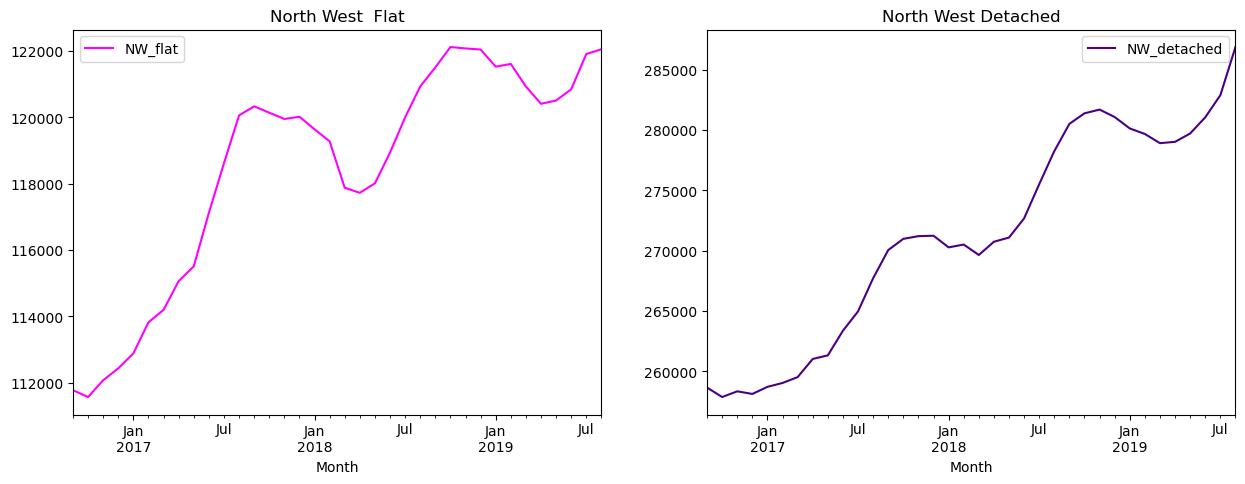

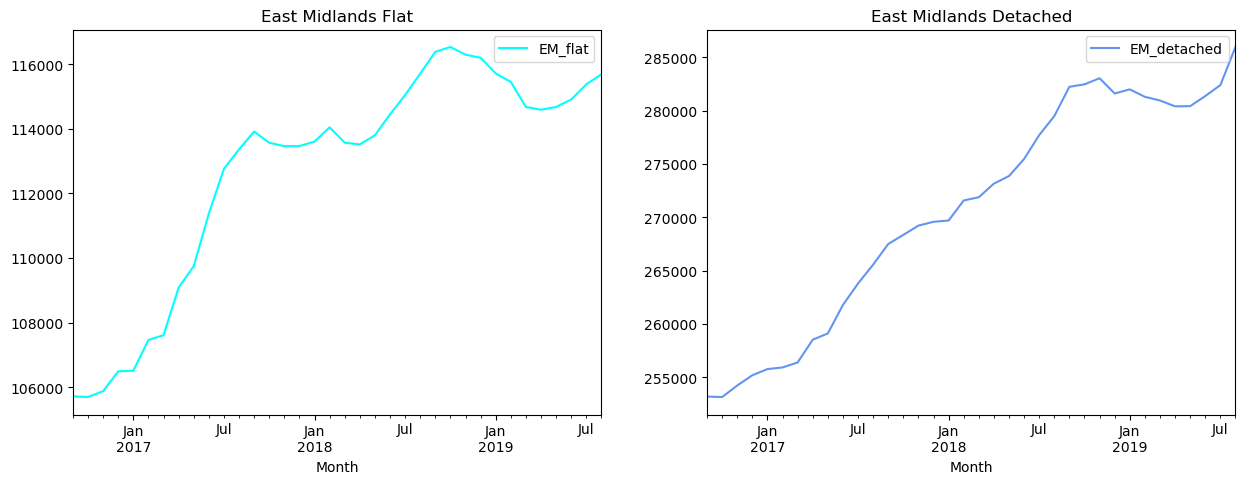

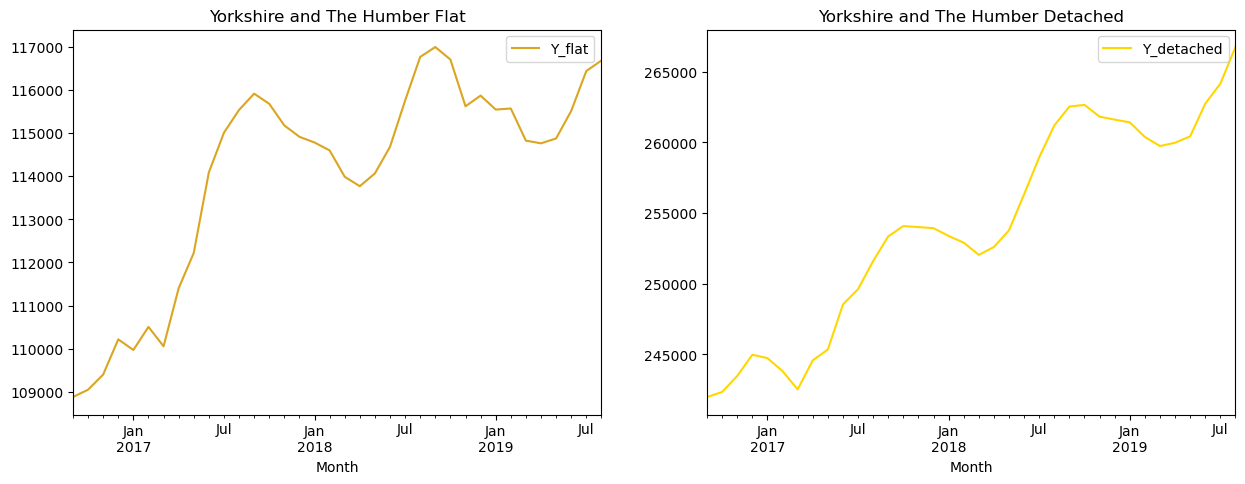

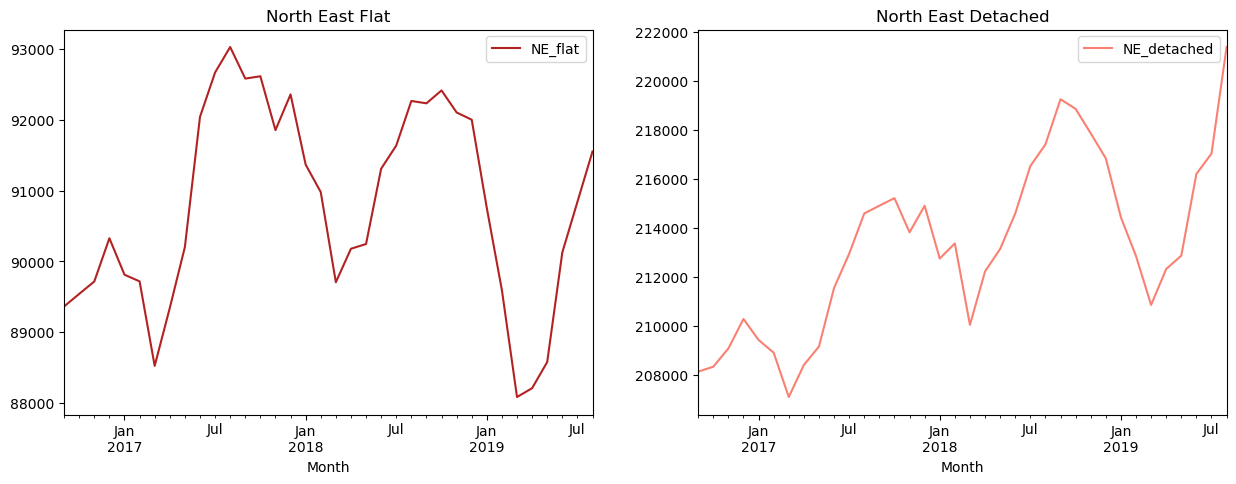

In [ ]:
# Plotting seasonal graphs for price changes to Flat and Detached properties by region

# London
fig, (a1, a2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.suptitle('Seasonal Changes in Flat and Detached property prices by Region', fontsize = 18)

seasonal.plot(y='L_flat', color='limegreen', ax=a1, title='London Flat')
seasonal.plot(y='L_detached', color='darkgreen', ax=a2, title='London Detached')

# South East
fig, (a1, a2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

seasonal.plot(y='SE_flat', color='saddlebrown', ax=a1, title='South East Flat')
seasonal.plot(y='SE_detached', color='peru', ax=a2, title='South East Detached')

# East of England
fig, (a1, a2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

seasonal.plot(y='EE_flat', color='darkorange', ax=a1, title='East of England Flat')
seasonal.plot(y='EE_detached', color='bisque', ax=a2, title='East of England Detached')

# South West
fig, (a1, a2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

seasonal.plot(y='SW_flat', color='hotpink', ax=a1, title='South West Flat')
seasonal.plot(y='SW_detached', color='lightpink', ax=a2, title='South West Detached')

# West Midlands
fig, (a1, a2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5)
                            )
seasonal.plot(y='WM_flat', color='dimgrey', ax=a1, title='West Midlands Flat')
seasonal.plot(y='WM_detached', color='lightgrey', ax=a2, title='West Midlands Detached')

# North West
fig, (a1, a2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

seasonal.plot(y='NW_flat', color='magenta', ax=a1, title='North West  Flat')
seasonal.plot(y='NW_detached', color='indigo', ax=a2, title='North West Detached')

# East Midlands
fig, (a1, a2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

seasonal.plot(y='EM_flat', color='cyan', ax=a1, title='East Midlands Flat')
seasonal.plot(y='EM_detached', color='cornflowerblue', ax=a2, title='East Midlands Detached')

# Yorkshire and The Humber
fig, (a1, a2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

seasonal.plot(y='Y_flat', color='goldenrod', ax=a1, title='Yorkshire and The Humber Flat')
seasonal.plot(y='Y_detached', color='gold', ax=a2, title='Yorkshire and The Humber Detached')

# North East
fig, (a1, a2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

seasonal.plot(y='NE_flat', color='firebrick', ax=a1, title='North East Flat')
seasonal.plot(y='NE_detached', color='salmon', ax=a2, title='North East Detached')

### Comments on the Seasonal changes in Flat and Detached property prices by Region

**Seasonal changes in Detached property prices across regions**

1) Seasonal changes in detached property types seem to be consistent across all regions.
2) London has a similar seasonal change/trend as the other regions except the magnitude of flat price increases and decreases are more pronounced.

The general seasonal change is:<br>

January- March: Decrease<br>
April- June: Increase<br>
July-September: Increase<br>
October- December: Decrease<br>

The seasonal changes shown in the above graphs for Detached property types are represented by all three years, and likely suggests that that a similar seasonal trend can be predicted into the future from where the data set ends.


**Seasonal changes in Flat property prices across regions**

1) Similar seasonal trends to Flat property prices can be seen across all regions although for some regions the magnitude of the peaks and dips in prices vary more than for others.
2) The North east has the greatest volatility and magnitude in price increases and decreases.

The general seasonal change is:<br>

January- March: Decrease<br>
April- June: Increase<br>
July-September: Increase<br>
October- December: Decrease<br>

The seasonal changes shown in the above graphs for Flat property types are represented by all three years, and likely suggests that that a similar seasonal trend can be predicted into the future from where the data set ends. Furthermore, the graphs suggest that the seasonal changes affects regions such as London, East of England and the South East slightly earlier than they do other regions. This observation an be made from the general shapes of the graph and the Peaks and troughs in Flat prices that occur around 1-2 months earlier in the above mentioned regions than the other ones.


## Part 3: Price Changes

### Calculating the change in price in each area between July 2017 and July 2018

In [ ]:
# Creating a dataframe to begin calculating changes in flat prices across different areas

area_price_change = area_pp[['Month','Area','Flat','RegionName']]
area_price_change.head()


,Month,Area,Flat,RegionName
0,2016-09-01,Hartlepool,62078.20672,North East
1,2016-10-01,Hartlepool,61893.84174,North East
2,2016-11-01,Hartlepool,61909.33647,North East
3,2016-12-01,Hartlepool,62919.44401,North East
4,2017-01-01,Hartlepool,60770.80795,North East


In [ ]:
# Creating a timestamp for July 2017 and july 2018

july2017 = datetime.datetime(2017,7,1)
july2018 = datetime.datetime(2018,7,1)

In [ ]:
# Creating two dataframe that only contains values dated from either july2017 or july 2018

apc_2017 = area_price_change[(area_price_change['Month'] == july2017)]
apc_2018 = area_price_change[(area_price_change['Month'] == july2018)]
apc_2017

,Month,Area,Flat,RegionName
10,2017-07-01,Hartlepool,65007.84170,North East
46,2017-07-01,Middlesbrough,69163.06963,North East
82,2017-07-01,Redcar and Cleveland,65507.80990,North East
118,2017-07-01,Stockton-on-Tees,83599.32806,North East
154,2017-07-01,Darlington,87041.37973,North East
...,...,...,...,...
5266,2017-07-01,Suffolk,140278.18370,East of England
5302,2017-07-01,Surrey,270116.52610,South East
5338,2017-07-01,Warwickshire,165676.94800,West Midlands
5374,2017-07-01,West Sussex,193547.45490,South East


In [ ]:
apc_2018

,Month,Area,Flat,RegionName
22,2018-07-01,Hartlepool,61116.82158,North East
58,2018-07-01,Middlesbrough,69313.90788,North East
94,2018-07-01,Redcar and Cleveland,64802.79724,North East
130,2018-07-01,Stockton-on-Tees,83654.55272,North East
166,2018-07-01,Darlington,83679.31818,North East
...,...,...,...,...
5278,2018-07-01,Suffolk,142488.46480,East of England
5314,2018-07-01,Surrey,267144.69100,South East
5350,2018-07-01,Warwickshire,167470.71860,West Midlands
5386,2018-07-01,West Sussex,191835.79530,South East


In [ ]:
# Renaming 'Flat' column as Flat 2017 for apc_2017

apc_2017 = apc_2017.rename(columns = {'Flat':'Flat2017'})
apc_2017

# Dropping the month column

apc_2017 = apc_2017.drop(['Month'], axis=1)

# Converting Area column into the index for the new apc 2017 dataframe

apc_2017.set_index('Area')


,Flat2017,RegionName
Area,,
Hartlepool,65007.84170,North East
Middlesbrough,69163.06963,North East
Redcar and Cleveland,65507.80990,North East
Stockton-on-Tees,83599.32806,North East
Darlington,87041.37973,North East
...,...,...
Suffolk,140278.18370,East of England
Surrey,270116.52610,South East
Warwickshire,165676.94800,West Midlands


In [ ]:
# Renaming 'Flat' column as Flat 2018 for apc_2018

apc_2018 = apc_2018.rename(columns = {'Flat':'Flat2018'})
apc_2018

# Dropping the month column

apc_2018 = apc_2018.drop(['Month'], axis=1)

# Converting Area column into the index for the new apc 2018 dataframe

apc_2018.set_index('Area')


,Flat2018,RegionName
Area,,
Hartlepool,61116.82158,North East
Middlesbrough,69313.90788,North East
Redcar and Cleveland,64802.79724,North East
Stockton-on-Tees,83654.55272,North East
Darlington,83679.31818,North East
...,...,...
Suffolk,142488.46480,East of England
Surrey,267144.69100,South East
Warwickshire,167470.71860,West Midlands


In [ ]:
# Creating a dataframe called price change that contains the flat prices for each area in 2017 and 2018

price_change = apc_2017.merge(apc_2018,how = 'left',)
price_change

,Area,Flat2017,RegionName,Flat2018
0,Hartlepool,65007.84170,North East,61116.82158
1,Middlesbrough,69163.06963,North East,69313.90788
2,Redcar and Cleveland,65507.80990,North East,64802.79724
3,Stockton-on-Tees,83599.32806,North East,83654.55272
4,Darlington,87041.37973,North East,83679.31818
...,...,...,...,...
145,Suffolk,140278.18370,East of England,142488.46480
146,Surrey,270116.52610,South East,267144.69100
147,Warwickshire,165676.94800,West Midlands,167470.71860
148,West Sussex,193547.45490,South East,191835.79530


In [ ]:
# Calculating the change in flat prices by area

price_change['Price Change'] = price_change['Flat2017'] - price_change['Flat2018']

# Changing the area to the index

price_change = price_change.set_index('Area')
price_change

# Dropping unecessary columns

price_change =  price_change.drop(['Flat2017','Flat2018'], axis=1)
price_change

,RegionName,Price Change
Area,,
Hartlepool,North East,3891.02012
Middlesbrough,North East,-150.83825
Redcar and Cleveland,North East,705.01266
Stockton-on-Tees,North East,-55.22466
Darlington,North East,3362.06155
...,...,...
Suffolk,East of England,-2210.28110
Surrey,South East,2971.83510
Warwickshire,West Midlands,-1793.77060


### Visualising changes in flat prices in each area

### Calculating the change in flat prices by different areas within regions

In [ ]:
# Creating seperate dataframes for each region, containing changes in flat prices per area

SE = price_change[price_change['RegionName'].str.match('South East')]
NE = price_change[price_change['RegionName'].str.match('North East')]
NW = price_change[price_change['RegionName'].str.match('North West')]
YH = price_change[price_change['RegionName'].str.match('Yorkshire and The Humber')]
EM = price_change[price_change['RegionName'].str.match('East Midlands')]
WM = price_change[price_change['RegionName'].str.match('West Midlands')]
EE = price_change[price_change['RegionName'].str.match('East of England')]
L = price_change[price_change['RegionName'].str.match('London')]
SW = price_change[price_change['RegionName'].str.match('South West')]


<AxesSubplot:title={'center':'South West'}, xlabel='Area'>

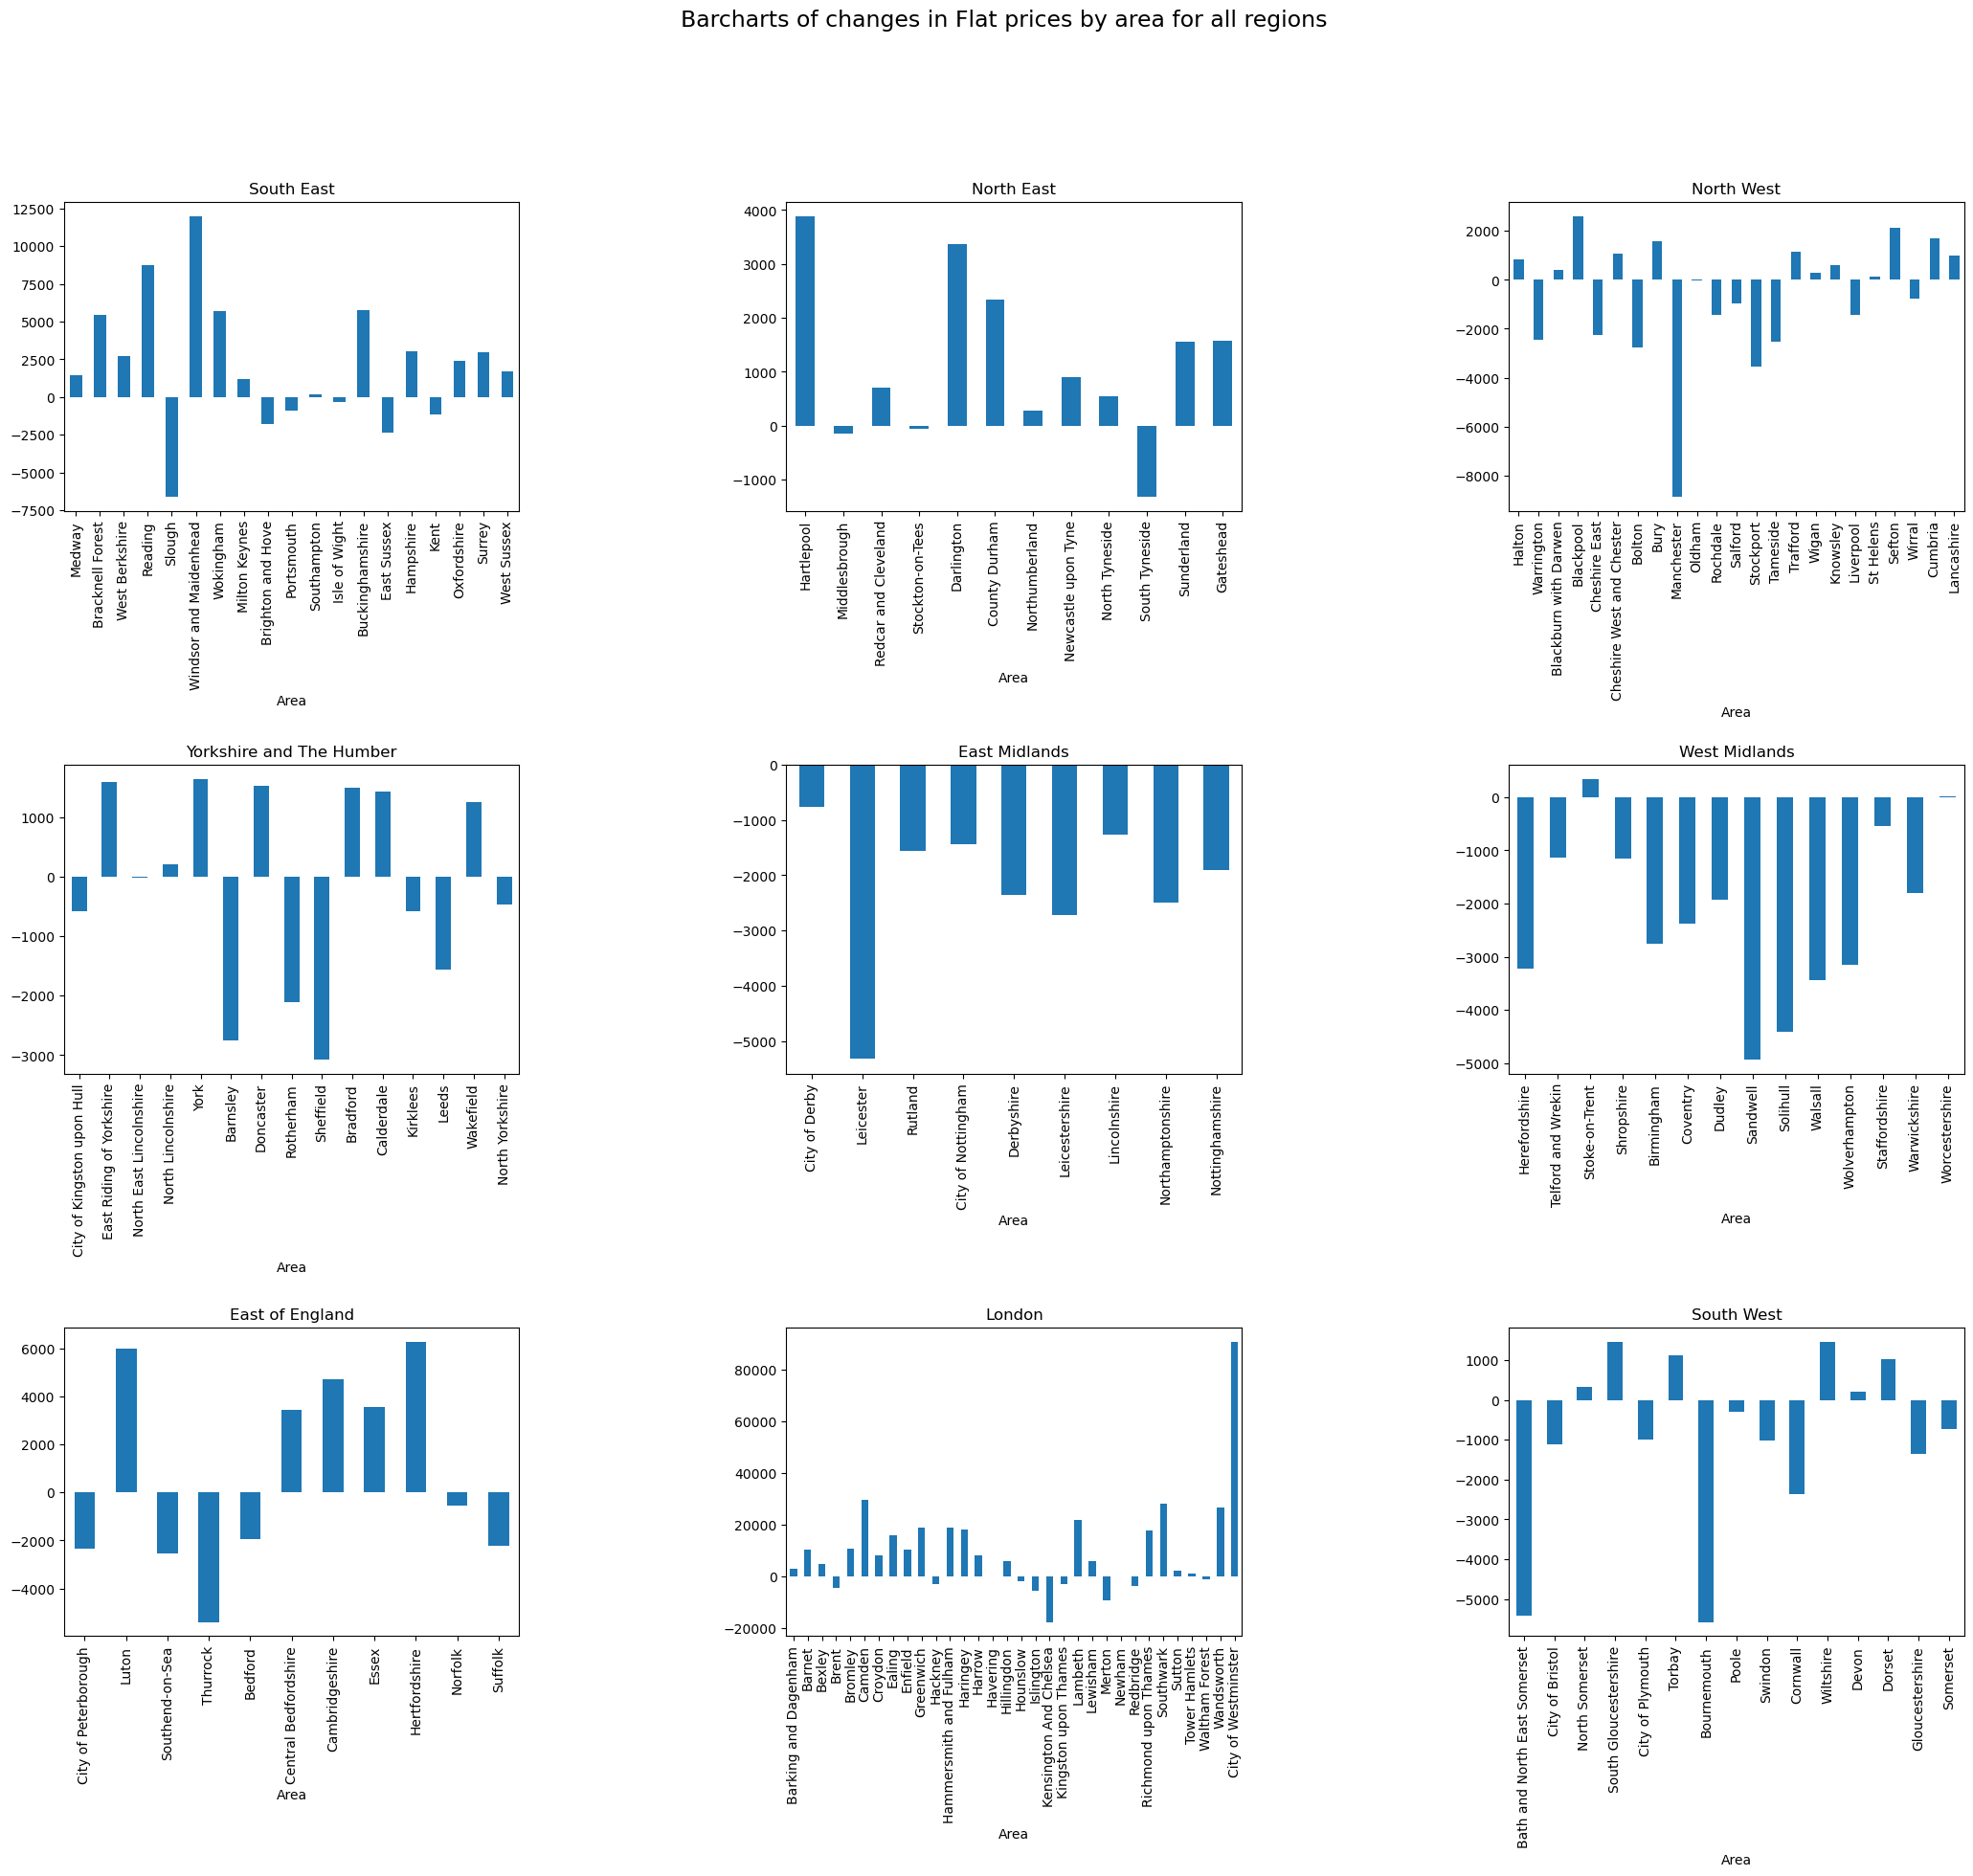

In [ ]:
# Creating a subplot of the regions showing changes in Flat prices by area

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,20))
fig.tight_layout(pad=17.0)
fig.suptitle("Barcharts of changes in Flat prices by area for all regions", fontsize=17)

SE['Price Change'].plot.bar(use_index=True, ax=axes[0,0], title='South East')
NE['Price Change'].plot.bar(use_index=True, ax=axes[0,1], title='North East')
NW['Price Change'].plot.bar(use_index=True, ax=axes[0,2], title='North West')
YH['Price Change'].plot.bar(use_index=True, ax=axes[1,0], title='Yorkshire and The Humber')
EM['Price Change'].plot.bar(use_index=True, ax=axes[1,1], title='East Midlands')
WM['Price Change'].plot.bar(use_index=True, ax=axes[1,2], title='West Midlands')
EE['Price Change'].plot.bar(use_index=True, ax=axes[2,0], title='East of England')
L['Price Change'].plot.bar(use_index=True, ax=axes[2,1], title='London')
SW['Price Change'].plot.bar(use_index=True, ax=axes[2,2], title='South West')

### Comments on the changes in area prices in each region

1) In the East Midlands regions all areas had a negative price change only.
2) In the West Midlands most areas had a negative price change although two areas had a slight increase.
3) In the North East all but one area had a price increase.
4) All other regions had a mixture, with some areas that had price increases and other that had decreases.
5) London has the most areas with increases in Flat prices and had the highest magnitude of increases and decreases.
6) London and in particular the City of London are the region and area in which the biggest price increase was observed
7) The biggest price drop in Flats was in The North West region in the Manchester area.
8) London has more areas than any other region, which could be due to the fact that it has a larger population and therefore more properties to be analysed or is a larger region.


**summary**

1) More expensive regions tend to have areas that have the biggest increases and decreases in flat prices than regions that generally have lower flat prices.
2) Cities and areas with a high population tend to have the biggest increases and decreases in Flat prices, compared to rural areas.
3) London and the South East have the most areas with the the largest increases in Flat prices.
















## Part 4: Statistical Analysis

### Cross-tabulating the number of areas in which the price has increased and the number has decreased, by region

In [ ]:
# Creating a column that shows whether the price region by area is and Increase or decrease

price_change['Change'] = price_change['Price Change']<0
price_change['Change'] = price_change['Change'].replace({True: 'Decrease', False: 'Increase'})
price_change

,RegionName,Price Change,Change
Area,,,
Hartlepool,North East,3891.02012,Increase
Middlesbrough,North East,-150.83825,Decrease
Redcar and Cleveland,North East,705.01266,Increase
Stockton-on-Tees,North East,-55.22466,Decrease
Darlington,North East,3362.06155,Increase
...,...,...,...
Suffolk,East of England,-2210.28110,Decrease
Surrey,South East,2971.83510,Increase
Warwickshire,West Midlands,-1793.77060,Decrease


In [ ]:
# Creating the cross-tab of Increase/Decrease price change given Region

region_given_change = pd.crosstab(price_change.Change, [price_change.RegionName])
region_given_change

RegionName,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Change,,,,,,,,,
Decrease,9,6,10,3,11,6,9,12,8
Increase,0,5,22,9,12,13,6,2,7


<AxesSubplot:xlabel='RegionName', ylabel='Change'>

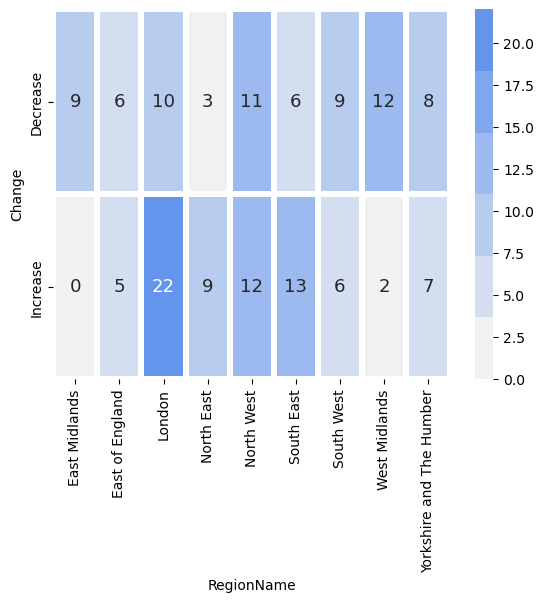

In [ ]:
# Creating a heatmap of the Cross-tab for easy visualisation

sns.heatmap(region_given_change.round(2), cmap=sns.light_palette('cornflowerblue'), linewidths = 4,
            annot=True, annot_kws={"size": 13}, fmt='g')

### Using a chi-square test to determine whether there is significant evidence to suggest that Flat price changes differ across regions

A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying.

**Null Hypothesis (Ho)** - There is no evidence to suggest that Flat price changes differ by regions.<br>
**Alternate Hypothesis (H1)** - There is evidence to suggest that Flat price changes differ by region.<br>

**Determining the significance level** (5%)<br>

The significance level chosen for this test is 5%<br>
The significance level has to be chosen carefully taking factors such as the sample size, test power and expected losses due to Type 1 and Type 2 error into consideration. A significance level of 5% is usually the most commonly used used significance level in science and is the most suitable for our test. The P values act as a cut-off and if our P-value calculated from our chi-squared test is greater than 5% it indicates that the findings are not statistically significant and we fail to reject the null hypothesis. Meanwhile, if the P-value is less than 5% it indicates that the findings are statistically significant and we are able to reject the null hypothesis.

In [ ]:
# Conducting the Chi-Squared Test on the cross-tab

test_stat, p_value, dof, expected = stats.chi2_contingency(region_given_change, correction=False)

print('There are %d degrees of freedom' % dof)
print('The chi-squared test statistic is %4.2f' % test_stat)
print('The p-value is %4.3f %%' % (100 * p_value))


There are 8 degrees of freedom
The chi-squared test statistic is 27.00
The p-value is 0.071 %


In [ ]:
# Creating a table of effect size

region_given_change - expected.round(1)

RegionName,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Change,,,,,,,,,
Decrease,4.6,0.6,-5.8,-2.9,-0.3,-3.4,1.6,5.1,0.6
Increase,-4.6,-0.6,5.8,2.9,0.3,3.4,-1.6,-5.1,-0.6


### Comments on Chi-Squared test

**P-value**

A p-value measures the probability of obtaining the observed results, assuming the null hypothesis is true. The lower the p-value, the greater the statistical significance of the observed difference. Our p-value of 0.071% is lower than the significance level we set at 5%, meaning our findings are considered statistically significant. We can reject the null hypothesis, suggesting there is evidence that flat price changes differ by region. Our low p-value may indicate that the results are replicable and that regions could potentially have a substantial effect on price changes. However, it is important to note that the chi-squared test is not designed to measure the effect size of the regions on price changes, but only to determine if there is enough evidence to suggest a link between region and price change. Therefore, to test the effect size of regions on price changes for flats, we should conduct further statistical analysis, such as a Pearson r correlation test.

**Chi-squared Test Statistic**

The chi-square statistic measures the difference between the counts we observed and the counts we would expect if there was no relationship between regions and flat price changes. A small chi-square test statistic means that there is a high correlation between the observed and expected values, and the sample data is a good fit for what would be expected in the general population. The chi-squared test statistic for our test was 27, which is considered high in our context. Since our test is a test for independence (e.g., if region has any effect on flat prices), a high test statistic suggests that our data does not behave according to the null hypothesis, indicating, like our p-value, that the null hypothesis can be rejected. In other words, there is significant evidence to suggest that flat price changes differ by region.

Using a contingency table, I found that for a significance level of 5% and 8 degrees of freedom, the critical value is 15.507. Since our test statistic of 27 is greater than the critical value, it again indicates that we can reject the null hypothesis, suggesting there is evidence that flat price changes differ by region.

**Further Analysis**

Although further statistical analysis must be conducted to test the effect size of regions on flat price changes, by examining our table of effect sizes, we could predict that the London region has the greatest effect on flat price changes, while the North West region has the least effect. These assumptions are based on the magnitude of the numbers, with larger numbers usually indicating a greater effect size.